In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Play Store Data.csv')

In [3]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

# **Handling the NaN values in the Play store data**

In [9]:
def playstoreInfo():
  temp = pd.DataFrame(index=df.columns)
  temp['data Type'] = df.dtypes
  temp['Non Null Values'] = df.count()
  temp['Null Values'] = df.isnull().sum()
  temp['% Of Null Values'] = df.isnull().mean()*100
  temp['Unique Counts'] = df.nunique()
  return temp

In [10]:
playstoreInfo()

data Type  Non Null Values  Null Values  % Of Null Values  \
App               object            10841            0          0.000000   
Category          object            10841            0          0.000000   
Rating           float64             9367         1474         13.596532   
Reviews           object            10841            0          0.000000   
Size              object            10841            0          0.000000   
Installs          object            10841            0          0.000000   
Type              object            10840            1          0.009224   
Price             object            10841            0          0.000000   
Content Rating    object            10840            1          0.009224   
Genres            object            10841            0          0.000000   
Last Updated      object            10841            0          0.000000   
Current Ver       object            10833            8          0.073794   
Android Ver       object            10838            3          0.027673   

                Unique Counts  
App                      9660  
Category                   34  
Rating                     40  
Reviews                  6002  
Size                      462  
Installs                   22  
Type                        3  
Price                      93  
Content Rating              6  
Genres                    120  
Last Updated             1378  
Current Ver              2832  
Android Ver                33

Rating has 1474 null values which contributes 13.60% of the data. Type has 1 null value which contributes 0.01% of the data. Content_Rating has 1 null value which contributes 0.01% of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver has 3 null values which contributes 0.03% of the data.


**Lets first deal with the columns which contains lesser number of NaN values.**

## 1. Android Ver: Android_Ver has 3 null values.

In [11]:
df[df['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews    Size Installs  Type     Price Content Rating  \
4453      230     11M   1,000+  Paid     $1.49       Everyone   
4490      189    2.1M  10,000+  Free         0       Everyone   
10472    3.0M  1,000+     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [12]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the NaN values in the Android Ver column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which contributes less than 0.03% of the total rows in the given dataset, it can be be dropped.

In [13]:
df = df[df['Android Ver'].notna()]

In [14]:
df.shape

(10838, 13)

We were successfully able to handle the NaN values in theAndroid Vercolumn.


# 2. Current ver: Current ver has 8 null values.

```
# This is formatted as code
```



In [15]:
df[df['Current Ver'].isnull()]


App             Category  Rating Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2      55   
1553              Market Update Helper   LIBRARIES_AND_DEMO     4.1   20145   
6322            Virtual DJ Sound Mixer                TOOLS     4.2    4010   
6803                         BT Master               FAMILY     NaN       0   
7333                       Dots puzzle               FAMILY     4.0     179   
7407                   Calculate My IQ               FAMILY     NaN      44   
7730                            UFO-CQ                TOOLS     NaN       1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE     NaN       8   

       Size    Installs  Type  Price Content Rating             Genres  \
15     2.7M      5,000+  Free      0       Everyone       Art & Design   
1553    11k  1,000,000+  Free      0       Everyone   Libraries & Demo   
6322   8.7M    500,000+  Free      0       Everyone              Tools   
6803   222k        100+  Free      0       Everyone          Education   
7333    14M     50,000+  Paid  $0.99       Everyone             Puzzle   
7407   7.2M     10,000+  Free      0       Everyone      Entertainment   
7730   237k         10+  Paid  $0.99       Everyone              Tools   
10342  658k      1,000+  Free      0       Everyone  Books & Reference   

            Last Updated Current Ver Android Ver  
15          June 6, 2018         NaN  4.2 and up  
1553   February 12, 2013         NaN  1.5 and up  
6322        May 10, 2017         NaN  4.0 and up  
6803    November 6, 2016         NaN  1.6 and up  
7333      April 18, 2018         NaN  4.0 and up  
7407       April 3, 2017         NaN  2.3 and up  
7730        July 4, 2016         NaN  2.0 and up  
10342   January 31, 2017         NaN  3.0 and up

In [16]:
df['Current Ver'].isnull().sum()

8

In [17]:
df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [18]:
df = df[df['Current Ver'].notna()]

In [19]:
df.shape

(10830, 13)

# 3. Type: Type has only one null values

In [20]:
df[df['Type'].isnull()]

App Category  Rating Reviews                Size  \
9148  Command & Conquer: Rivals   FAMILY     NaN       0  Varies with device   

     Installs Type Price Content Rating    Genres   Last Updated  \
9148        0  NaN     0   Everyone 10+  Strategy  June 28, 2018   

             Current Ver         Android Ver  
9148  Varies with device  Varies with device

In [21]:
df['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

The Type column contains only two entries, namely, Free and Paid. Also, if the app is of type-paid, the price of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [22]:
df.loc[9148,'Type']='Free'

In [23]:
df[df['Type'].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

# 4. Content Rating: This column contain 1470 NaN values

In [24]:
df[df['Content Rating'].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [25]:
df[df['Rating'].isnull()]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free     0       Everyone   
113       182  5.7M  100,000+  Free     0   Everyone 10+   
123       119  3.7M   50,000+  Free     0       Everyone   
126       654  7.4M  100,000+  Free     0           Teen   
129        77  2.9M   10,000+  Free     0     Mature 17+   
...       ...   ...       ...   ...   ...            ...   
10824      67   82M   10,000+  Free     0       Everyone   
10825       7  7.7M      100+  Free     0           Teen   
10831      38  9.8M    5,000+  Free     0       Everyone   
10835       0  9.6M       10+  Free     0       Everyone   
10838       3  9.5M    1,000+  Free     0       Everyone   

                                Genres        Last Updated Current Ver  \
23     Art & Design;Action & Adventure       March 7, 2018       1.0.0   
113                             Beauty  September 20, 2017         8.0   
123                             Beauty       July 23, 2018         1.3   
126                             Beauty       July 17, 2018        1.15   
129                             Beauty      August 8, 2017         2.0   
...                                ...                 ...         ...   
10824                          Medical       July 31, 2018       2.2.2   
10825                           Social    February 2, 2018         1.0   
10831                Maps & Navigation       June 13, 2018   2.0.148.0   
10835                         Business  September 29, 2016       1.1.5   
10838                          Medical    January 20, 2017         1.0   

      Android Ver  
23     4.1 and up  
113    3.0 and up  
123    4.1 and up  
126    4.1 and up  
129    2.3 and up  
...           ...  
10824  4.4 and up  
10825  4.0 and up  
10831  4.0 and up  
10835  4.0 and up  
10838  2.2 and up  

[1470 rows x 13 columns]

In [26]:
df['Rating'].isnull().sum()

1470

we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [27]:
df[(df['Rating']<1) | (df['Rating']>5)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []



*    The Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
*   The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.




In [28]:
mean_rating = round(df[~df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df[~df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1918, 4.3]

**Visualization of distribution of rating using displot and detecting the outliers through boxplot**

<ipython-input-29-f9128b897018>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],color = 'firebrick',ax=ax[0])


<Axes: xlabel='Rating'>

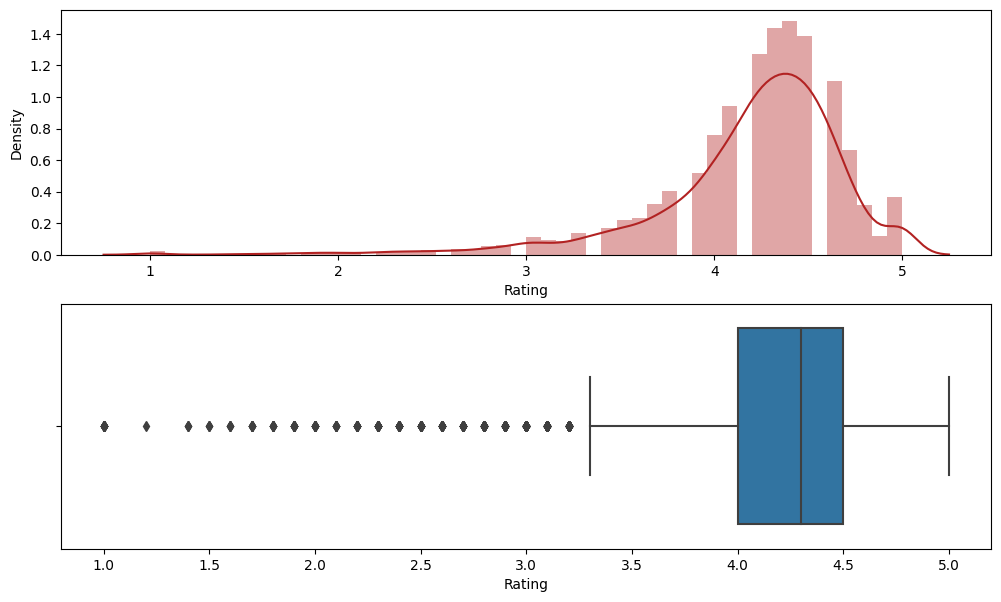

In [29]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df['Rating'],color = 'firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=df, ax=ax[1])



*   The mean of the average ratings (excluding the NaN values) comes to be 4.2.
*   The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
*   From the distplot visualizations, it is clear that the ratings are left skewed.
*  We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
*  Hence we will impute the NaN values in the Rating column with its median.



In [30]:
df['Rating'].fillna(value=median_rating,inplace = True)

# Handling duplicates values

In [31]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [32]:
df[df['App']=='ROBLOX']

App Category  Rating  Reviews Size      Installs  Type Price  \
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free     0   
1701  ROBLOX     GAME     4.5  4447346  67M  100,000,000+  Free     0   
1748  ROBLOX     GAME     4.5  4448791  67M  100,000,000+  Free     0   
1841  ROBLOX     GAME     4.5  4449882  67M  100,000,000+  Free     0   
1870  ROBLOX     GAME     4.5  4449910  67M  100,000,000+  Free     0   
2016  ROBLOX   FAMILY     4.5  4449910  67M  100,000,000+  Free     0   
2088  ROBLOX   FAMILY     4.5  4450855  67M  100,000,000+  Free     0   
2206  ROBLOX   FAMILY     4.5  4450890  67M  100,000,000+  Free     0   
4527  ROBLOX   FAMILY     4.5  4443407  67M  100,000,000+  Free     0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1701   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1748   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1841   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1870   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2016   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2088   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2206   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
4527   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  
1653  2.347.225742  4.1 and up  
1701  2.347.225742  4.1 and up  
1748  2.347.225742  4.1 and up  
1841  2.347.225742  4.1 and up  
1870  2.347.225742  4.1 and up  
2016  2.347.225742  4.1 and up  
2088  2.347.225742  4.1 and up  
2206  2.347.225742  4.1 and up  
4527  2.347.225742  4.1 and up

In [33]:
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews                Size      Installs  Type Price Content Rating  \
229      80805  Varies with device    5,000,000+  Free     0       Everyone   
236     159872  Varies with device   10,000,000+  Free     0       Everyone   
239      70991  Varies with device    5,000,000+  Free     0       Everyone   
256      31614                 37M   10,000,000+  Free     0       Everyone   
261       6989  Varies with device    1,000,000+  Free     0       Everyone   
...        ...                 ...           ...   ...   ...            ...   
8643    404610  Varies with device   10,000,000+  Free     0       Everyone   
8654     25370  Varies with device    1,000,000+  Free     0       Everyone   
8658   2401017  Varies with device  100,000,000+  Free     0       Everyone   
10049      123                 86M       10,000+  Free     0       Everyone   
10768       63                 24M       10,000+  Free     0       Everyone   

             Genres       Last Updated         Current Ver         Android Ver  
229        Business  February 26, 2018  Varies with device        4.0.3 and up  
236        Business      July 31, 2018  Varies with device  Varies with device  
239        Business      July 24, 2018    2.19.0.204537701          4.4 and up  
256        Business      July 20, 2018      4.1.28165.0716          4.0 and up  
261        Business      July 16, 2018           4.3.0.508          4.4 and up  
...             ...                ...                 ...                 ...  
8643   Productivity      April 6, 2018  Varies with device  Varies with device  
8654   Productivity     August 6, 2018  Varies with device  Varies with device  
8658   Productivity      June 27, 2018  Varies with device  Varies with device  
10049       Medical       June 1, 2018              0.6.88          5.0 and up  
10768       Medical      June 22, 2018               2.3.1          5.0 and up  

[483 rows x 13 columns]

In [34]:
df.duplicated().sum()

483

In [35]:
df.drop_duplicates(subset = 'App',inplace = True)

In [36]:
df.shape

(9649, 13)

In [37]:
df[df['App']=='ROBLOX']

App Category  Rating  Reviews Size      Installs  Type Price  \
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free     0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  
1653  2.347.225742  4.1 and up

We have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

# Manipulating dataset:

In [38]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

**1. Changing the datatype of the Last Updated column from string to datetime.**

In [39]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [40]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   object        
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.0+ MB


 **2. Changing the datatype of the Price column from string to float.**

In [42]:
df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [43]:
def convert_doller(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [44]:
df['Price']=df['Price'].apply(lambda x: convert_doller(x))

In [45]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type  Price Content Rating  \
0     159   19M      10,000+  Free    0.0       Everyone   
1     967   14M     500,000+  Free    0.0       Everyone   
2   87510  8.7M   5,000,000+  Free    0.0       Everyone   
3  215644   25M  50,000,000+  Free    0.0           Teen   
4     967  2.8M     100,000+  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [46]:
df[df['Price']!=0].head()

App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

    Reviews                Size  Installs  Type  Price Content Rating  \
234   11442                6.8M  100,000+  Paid   4.99       Everyone   
235   10295                 39M  100,000+  Paid   4.99       Everyone   
427   18247  Varies with device  100,000+  Paid   3.99       Everyone   
476    1545  Varies with device   10,000+  Paid   3.99     Mature 17+   
477      57                6.2M    1,000+  Paid   6.99       Everyone   

            Genres Last Updated  Current Ver Android Ver  
234       Business   2018-03-25        1.5.2  4.0 and up  
235       Business   2017-04-11        3.4.6  3.0 and up  
427  Communication   2018-07-05  7.5.3.20547  4.1 and up  
476         Dating   2018-06-19      2.6.139  4.1 and up  
477         Dating   2017-10-25        1.1.6  4.0 and up

**3. Converting the values in theInstalls column from string datatype to integer datatype.**

In [47]:
df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [48]:
def convert_plus(val):
  if '+' and ',' in val:
    return int(val[:-1].replace(',',''))
  if '+' in val:
    return int(val[:-1])
  else:
    return val

In [49]:
df['Installs'] = df['Installs'].apply(lambda x: convert_plus(x))

In [50]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159   19M     10000  Free    0.0       Everyone   
1     967   14M    500000  Free    0.0       Everyone   
2   87510  8.7M   5000000  Free    0.0       Everyone   
3  215644   25M  50000000  Free    0.0           Teen   
4     967  2.8M    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

**4. Converting the values in theSizecolumn to a same unit of measure(MB).**

In [51]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [52]:
df[df['Size']=='Varies with device']

App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10713  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10725                                          Posta App  MAPS_AND_NAVIGATION   
10765                    Chat For Strangers - Video Chat               SOCIAL   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating Reviews                Size  Installs  Type  Price  \
37        4.1   36639  Varies with device   5000000  Free    0.0   
42        4.4  295221  Varies with device  10000000  Free    0.0   
52        4.6   17057  Varies with device   1000000  Free    0.0   
67        4.3   40211  Varies with device   5000000  Free    0.0   
68        3.9     356  Varies with device    100000  Free    0.0   
...       ...     ...                 ...       ...   ...    ...   
10713     4.4    3471  Varies with device    100000  Free    0.0   
10725     3.6       8  Varies with device      1000  Free    0.0   
10765     3.4     622  Varies with device    100000  Free    0.0   
10826     4.0   88486  Varies with device   5000000  Free    0.0   
10839     4.5     114  Varies with device      1000  Free    0.0   

      Content Rating             Genres Last Updated         Current Ver  \
37          Everyone       Art & Design   2018-07-14  Varies with device   
42          Everyone       Art & Design   2018-07-30  Varies with device   
52          Everyone    Auto & Vehicles   2018-07-30  Varies with device   
67          Everyone    Auto & Vehicles   2018-07-30  Varies with device   
68          Everyone    Auto & Vehicles   2018-05-25  Varies with device   
...              ...                ...          ...                 ...   
10713       Everyone            Weather   2018-07-24  Varies with device   
10725       Everyone  Maps & Navigation   2017-09-27  Varies with device   
10765     Mature 17+             Social   2018-05-23  Varies with device   
10826     Mature 17+             Social   2018-03-23  Varies with device   
10839     Mature 17+  Books & Reference   2015-01-19  Varies with device   

              Android Ver  
37           2.3.3 and up  
42     Varies with device  
52     Varies with device  
67     Varies with device  
68     Varies with device  
...                   ...  
10713  Varies with device  
10725          4.4 and up  
10765  Varies with device  
10826  Varies with device  
10839  Varies with device  

[1227 rows x 13 columns]

In [53]:
def convert_kb (val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [54]:
df['Size'] = df['Size'].apply(lambda x: convert_kb(x))

In [55]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [56]:
df['Size']=df['Size'].astype(float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.0+ MB


In [58]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159  19.0     10000  Free    0.0       Everyone   
1     967  14.0    500000  Free    0.0       Everyone   
2   87510   8.7   5000000  Free    0.0       Everyone   
3  215644  25.0  50000000  Free    0.0           Teen   
4     967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

 **5. Converting the datatype of values in the Reviews column from string to int.**

In [59]:
df['Reviews'] = df['Reviews'].astype(int)

In [60]:
df['Installs'] = df['Installs'].astype(int)

In [61]:
df.describe()

Rating       Reviews         Size      Installs        Price
count  9649.000000  9.649000e+03  8422.000000  9.649000e+03  9649.000000
mean      4.192476  2.168145e+05    20.413556  7.785404e+06     1.100079
std       0.496528  1.832255e+06    21.833485  5.378557e+07    16.860857
min       1.000000  0.000000e+00     0.008300  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000  1.000000e+03     0.000000
50%       4.300000  9.690000e+02    12.000000  1.000000e+05     0.000000
75%       4.500000  2.944500e+04    28.000000  1.000000e+06     0.000000
max       5.000000  7.815831e+07   100.000000  1.000000e+09   400.000000

# Data Exploration--Univariate & Bivariate Analysis

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

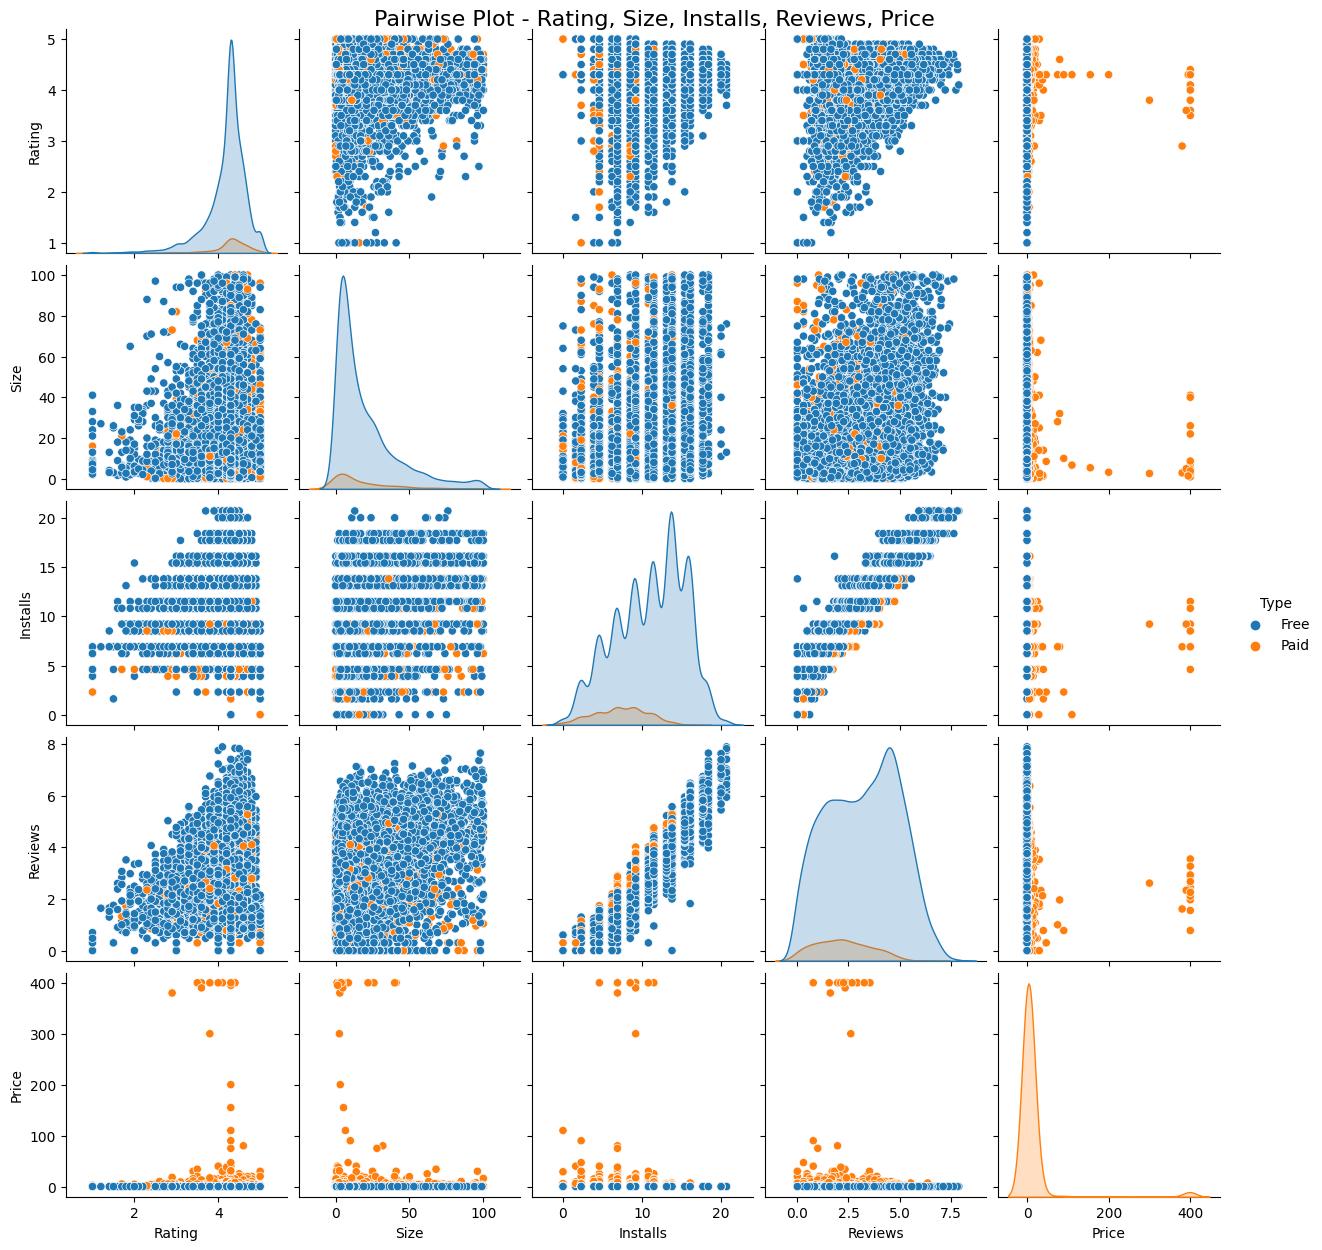

In [62]:
Rating = df['Rating']
Reviews = df['Reviews']
Size = df['Size']
Installs = df['Installs']
Price = df['Price']
Type = df['Type']
p=sns.pairplot(pd.DataFrame(list(zip(Rating,Size,np.log(Installs),np.log10(Reviews),Price,Type)),
                          columns = ['Rating','Size','Installs','Reviews','Price','Type']),hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

**Findings**

*   Most of the App are Free.
*    Most of the Paid Apps have Rating around 4
*   As the number of installation increases the number of reviews of the particaular app also increases.


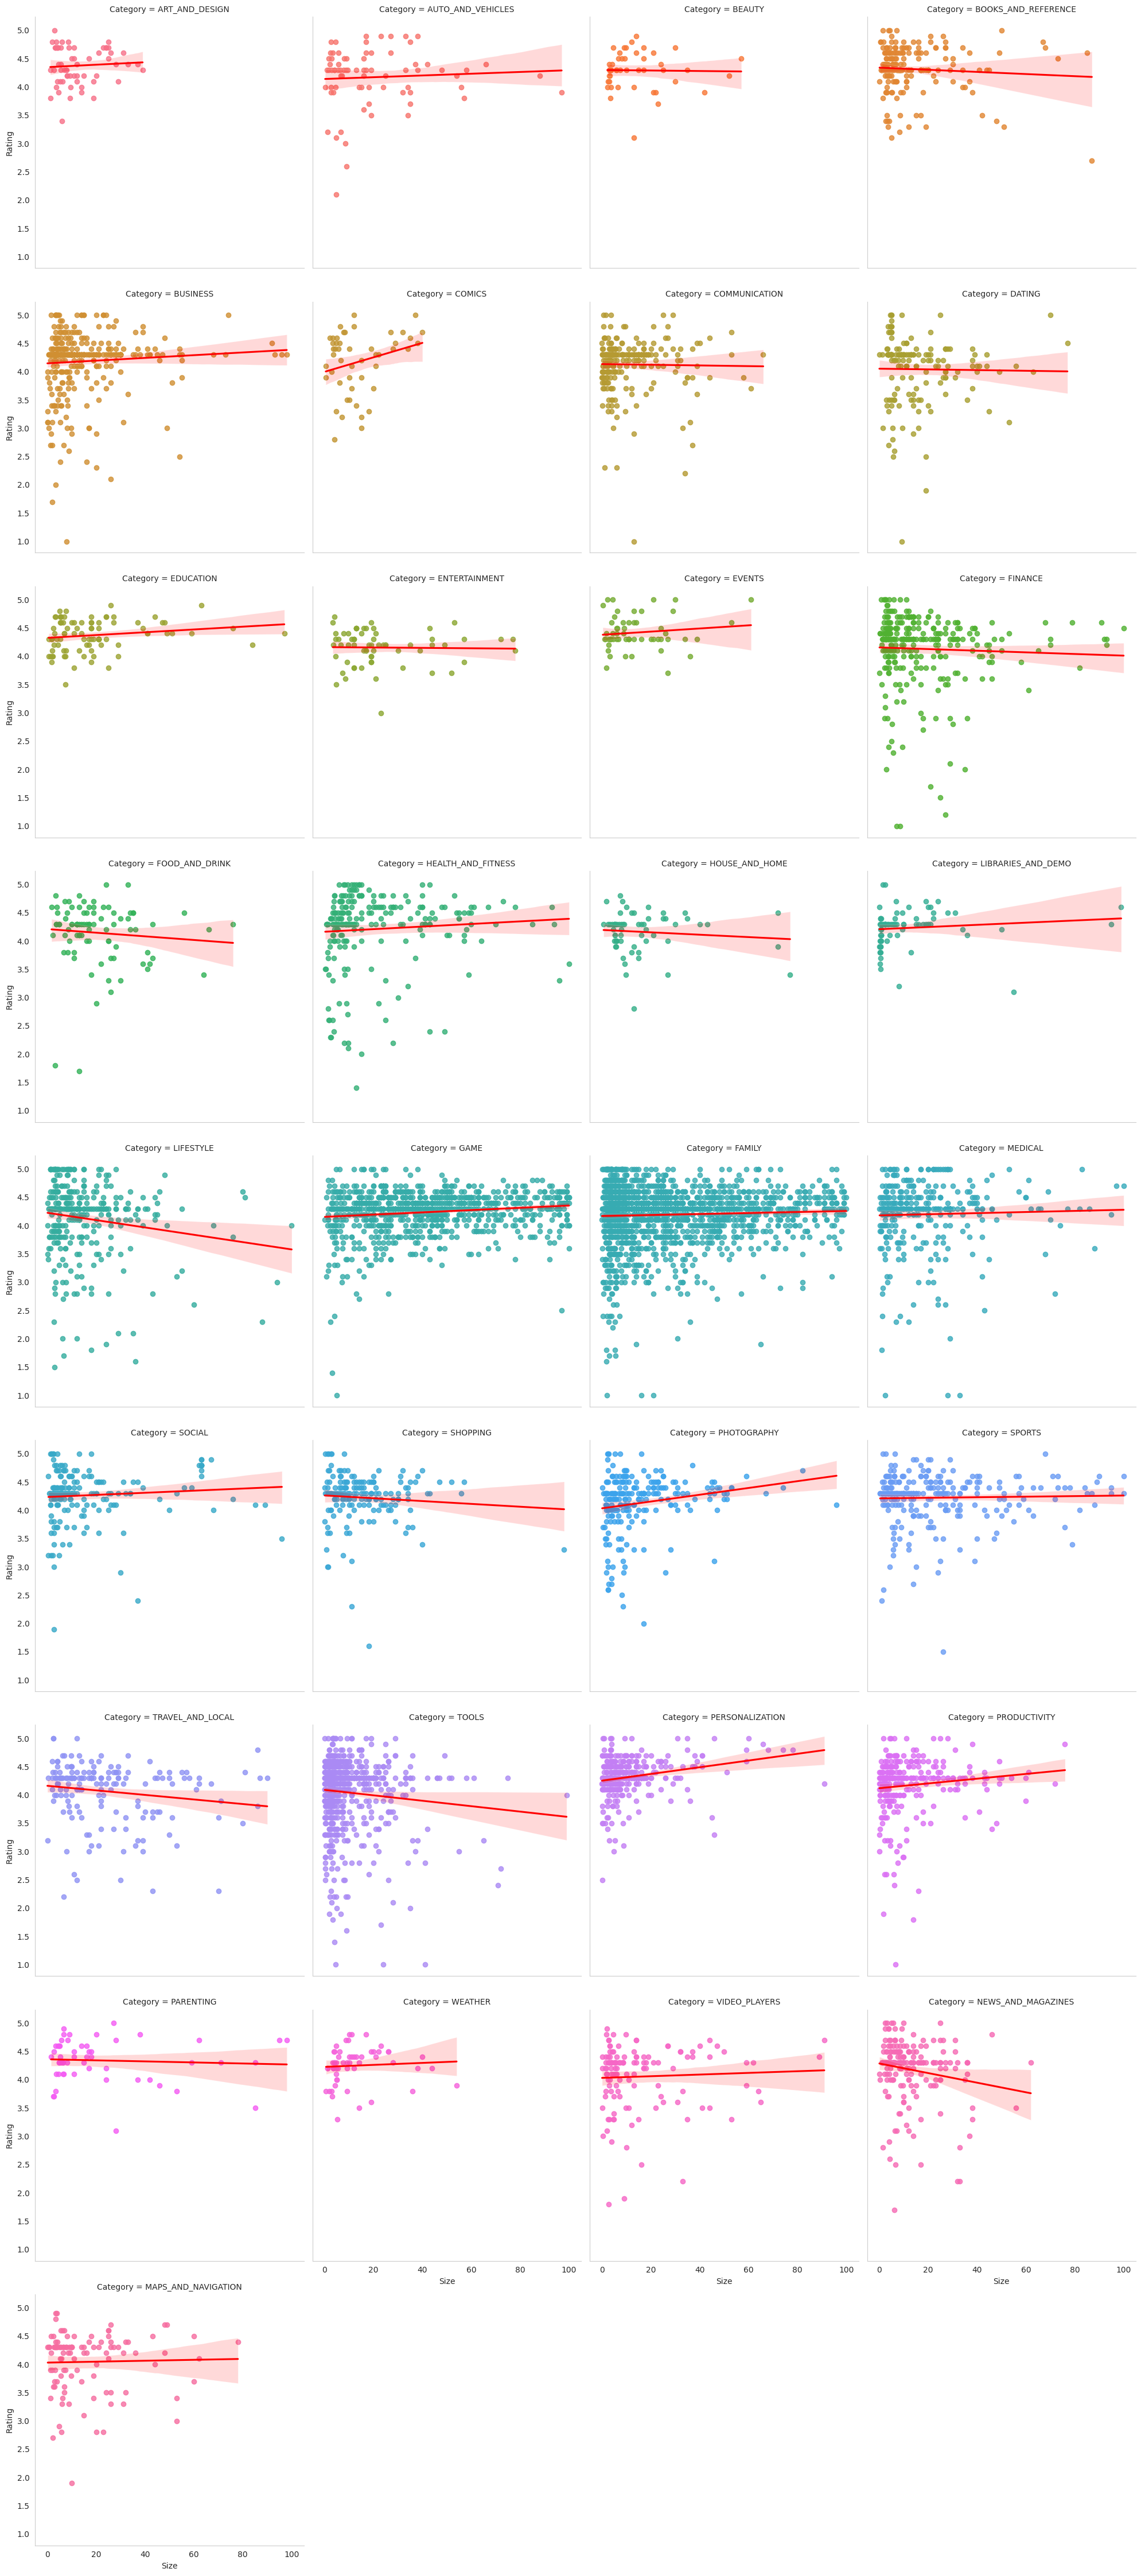

In [63]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})

# Exploring User_review dataframe

In [64]:
ur_df = pd.read_csv('User Reviews.csv')

In [65]:
ur_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [66]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [67]:
def urinfo():
  temp1=pd.DataFrame(index=ur_df.columns)
  temp1['DataType']= ur_df.dtypes
  temp1['non_null_value'] = ur_df.count()
  temp1['null value']= ur_df.isnull().sum()
  temp1['PercentageOfNullValue'] = ur_df.isnull().mean().round(4)*100
  temp1['unique_count'] = ur_df.nunique()
  return temp1
urinfo()

DataType  non_null_value  null value  \
App                      object           64295           0   
Translated_Review        object           37427       26868   
Sentiment                object           37432       26863   
Sentiment_Polarity      float64           37432       26863   
Sentiment_Subjectivity  float64           37432       26863   

                        PercentageOfNullValue  unique_count  
App                                      0.00          1074  
Translated_Review                       41.79         27994  
Sentiment                               41.78             3  
Sentiment_Polarity                      41.78          5410  
Sentiment_Subjectivity                  41.78          4474

**Handlin Of NaN Values**

In [68]:
ur_df[ur_df['Translated_Review'].isnull()]

App Translated_Review Sentiment  \
2            10 Best Foods for You               NaN       NaN   
7            10 Best Foods for You               NaN       NaN   
15           10 Best Foods for You               NaN       NaN   
102          10 Best Foods for You               NaN       NaN   
107          10 Best Foods for You               NaN       NaN   
...                            ...               ...       ...   
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
2                     NaN                     NaN  
7                     NaN                     NaN  
15                    NaN                     NaN  
102                   NaN                     NaN  
107                   NaN                     NaN  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[26868 rows x 5 columns]

In [69]:
ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

App Translated_Review Sentiment  \
268                                         11st               NaN   Neutral   
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0

In [70]:
ur_df = ur_df.dropna()

In [71]:
ur_df.shape

(37427, 5)

# Data Visualization On PlayStore Data

In [72]:
df.corr()

<ipython-input-72-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.050212  0.045528  0.034306 -0.018674
Reviews   0.050212  1.000000  0.179275  0.625158 -0.007603
Size      0.045528  0.179275  1.000000  0.134216 -0.022494
Installs  0.034306  0.625158  0.134216  1.000000 -0.009412
Price    -0.018674 -0.007603 -0.022494 -0.009412  1.000000

<ipython-input-73-329f1138cbef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

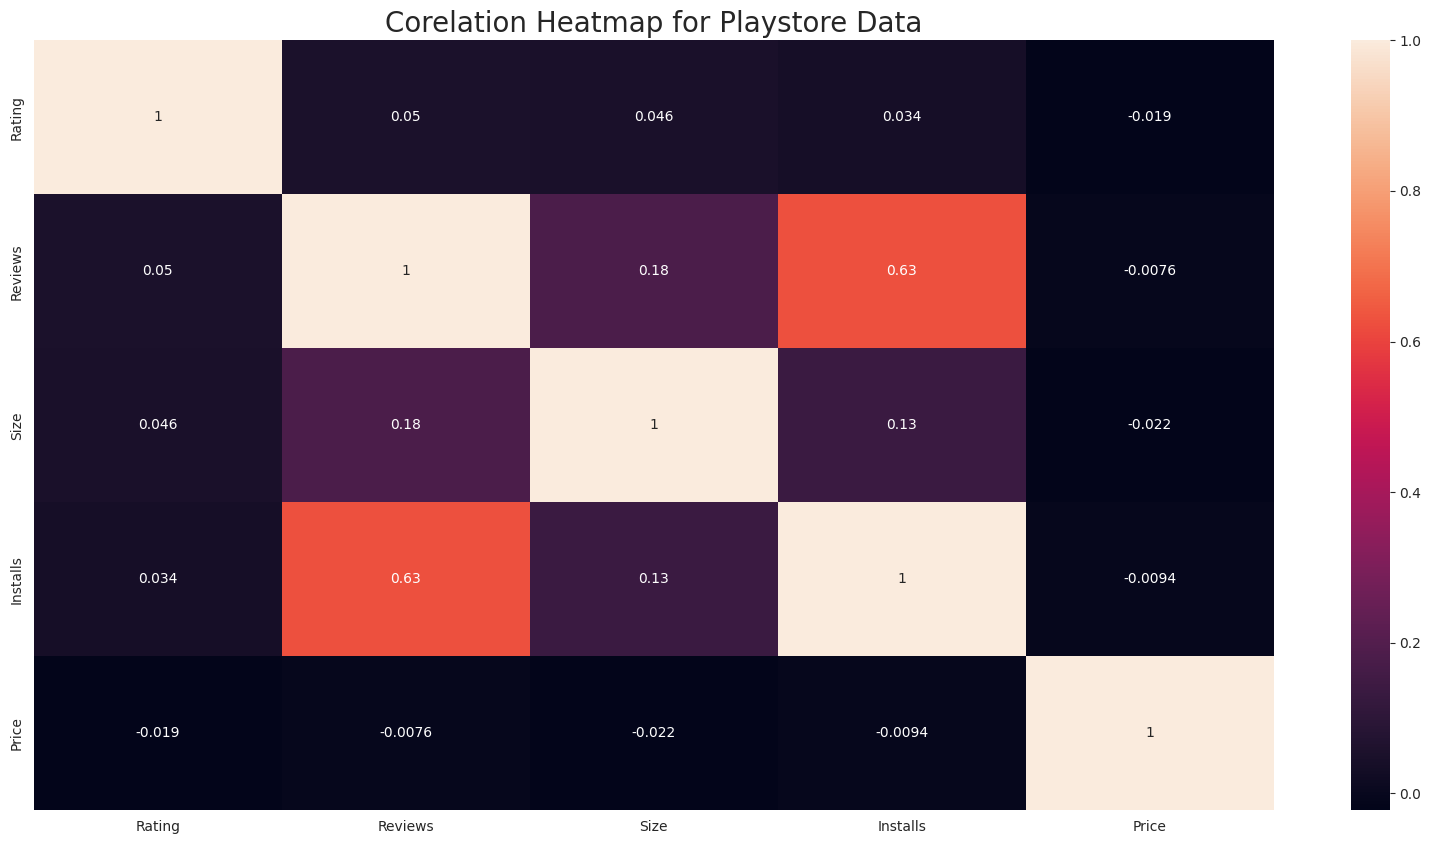

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Corelation Heatmap for Playstore Data',size=20)



*   There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
*   ThePriceis slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.



In [74]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

# Q. What is the Percentage of number of Paid apps and Free apps?

In [75]:
data = df['Type'].value_counts()
labels = ['Free','Paid']
explode = (0.01,0.1)


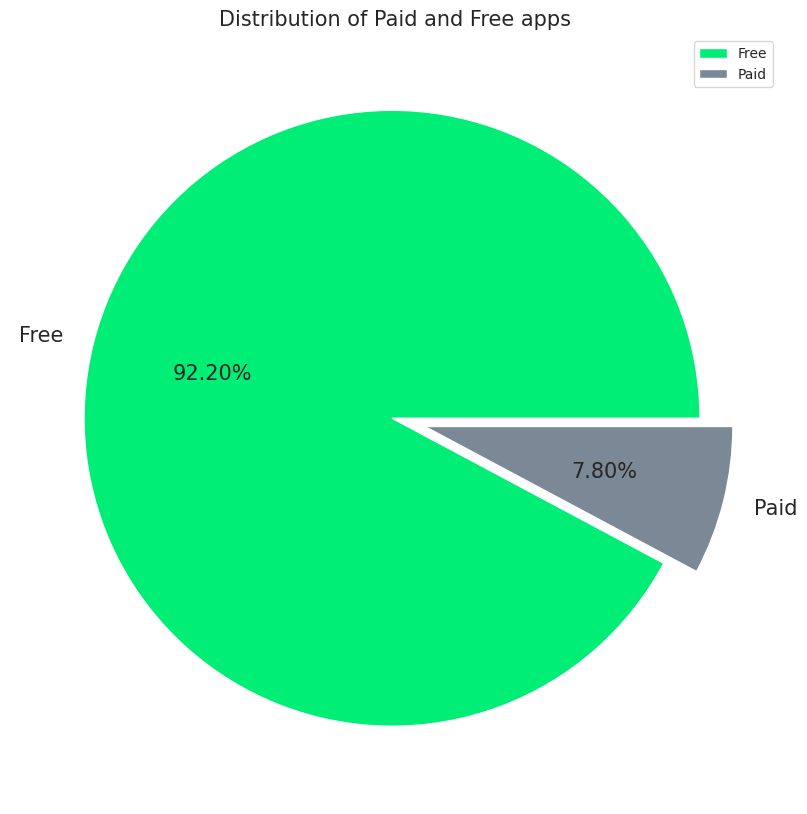

In [76]:
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
plt.pie(data,labels=labels,autopct='%.2f%%',explode=explode,textprops={'fontsize': 15},colors=colors)
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

**Findings:**

 From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

#Q. Which category of Apps from the Content Rating column are found more on playstore ?

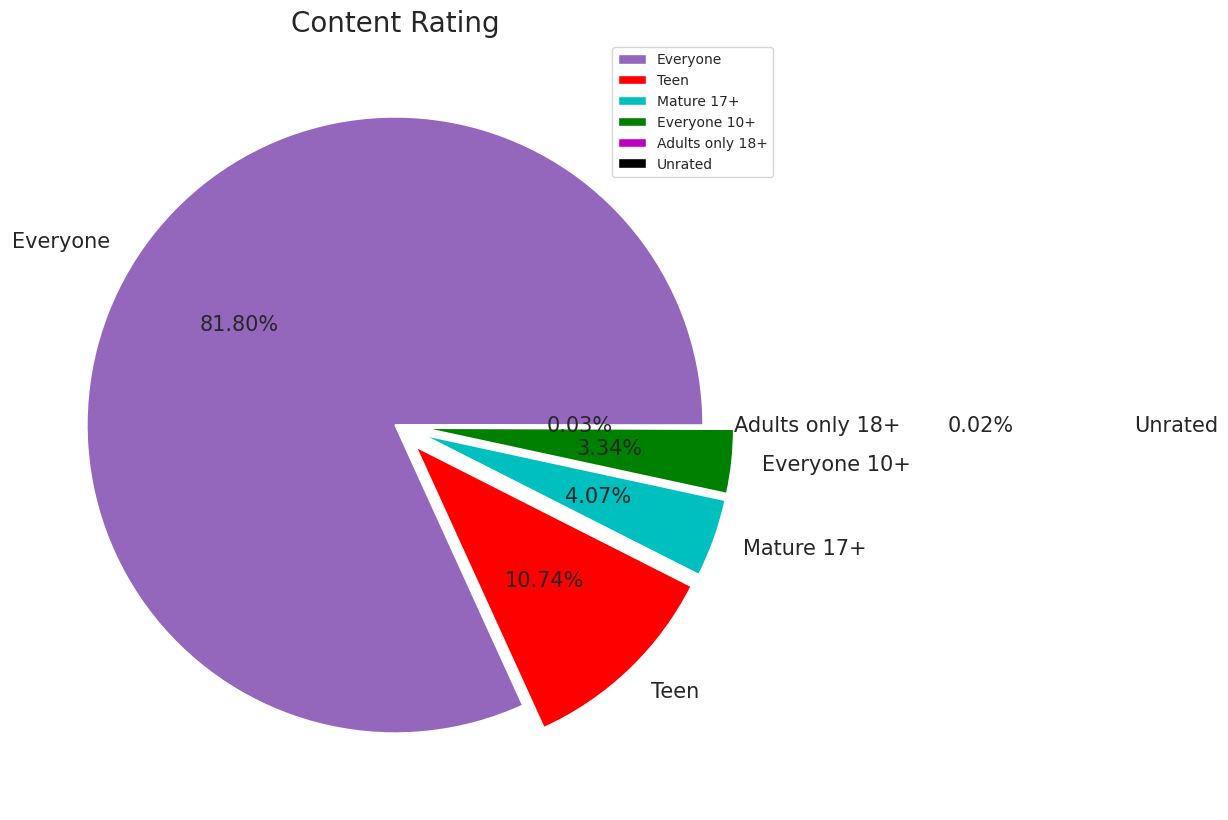

In [77]:
content_rating = df['Content Rating' ].value_counts()
labels = ['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated' ]
plt.figure(figsize=(10,10))
colors = ['C4','r','c','g','m','k']
explode=(0,0.1,0.1,0.1,0.0,1.3)
plt.pie(content_rating,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

**Findings:**
A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

In [78]:
content_rating

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# Q. Which is the Top categories on Google Playstore?

In [79]:
df.groupby('Category')['App'].count().sort_values(ascending=False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [80]:
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

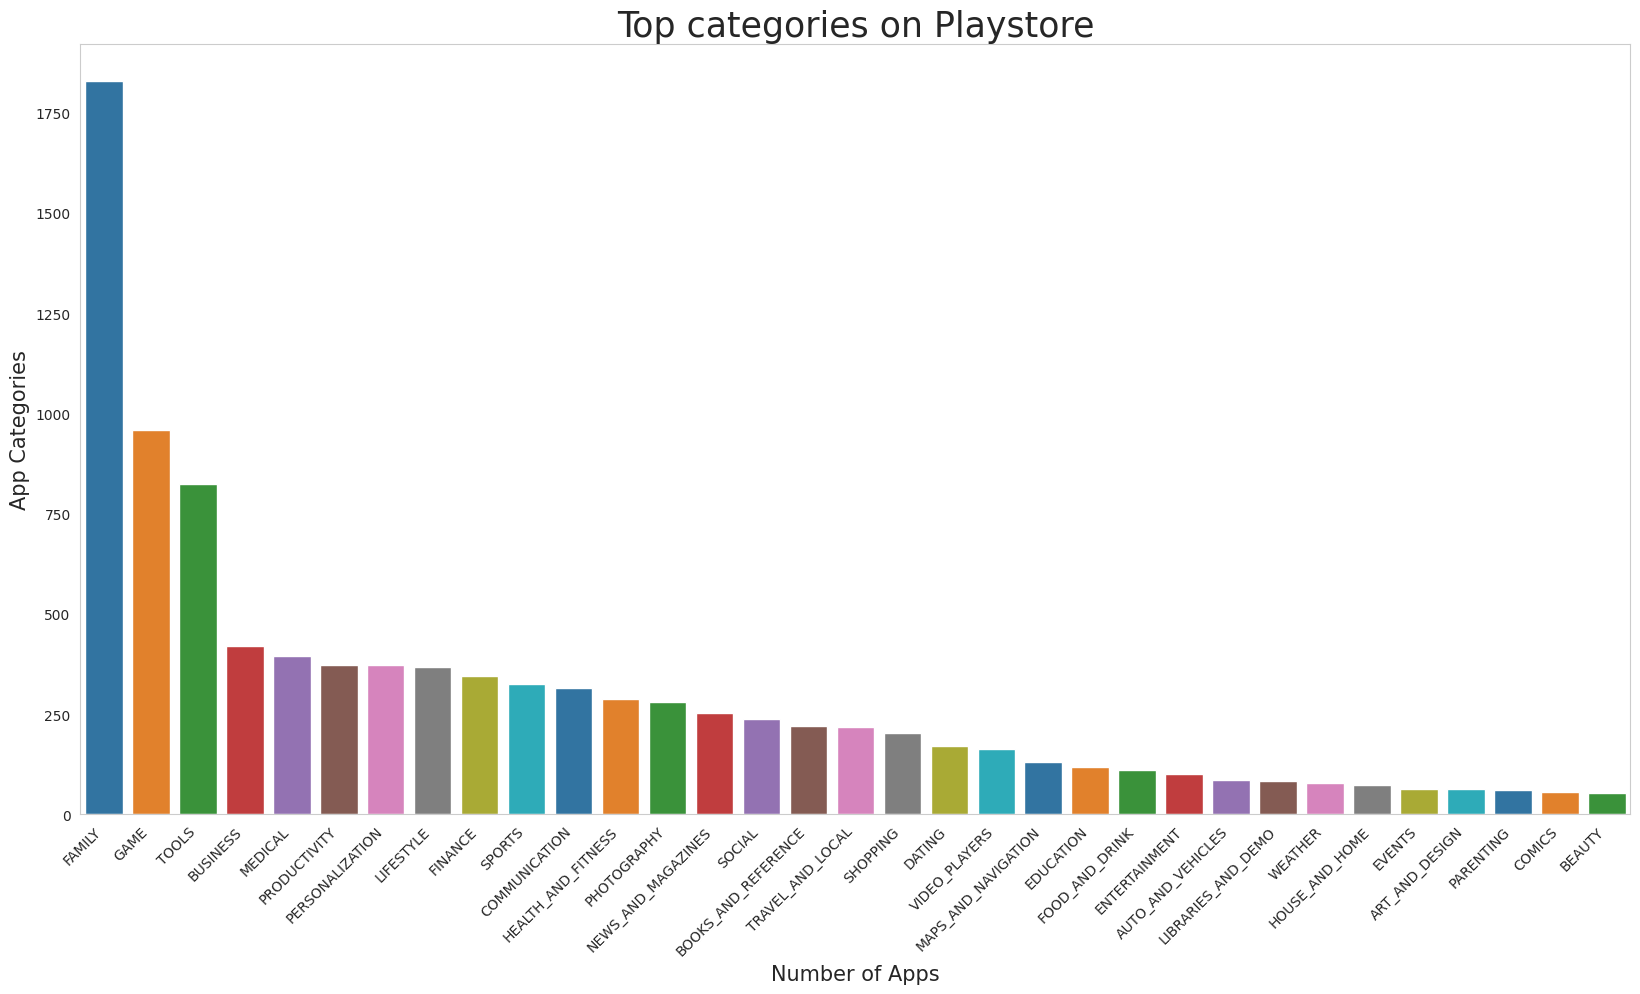

In [81]:
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

In [82]:
df.Category.value_counts()

FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

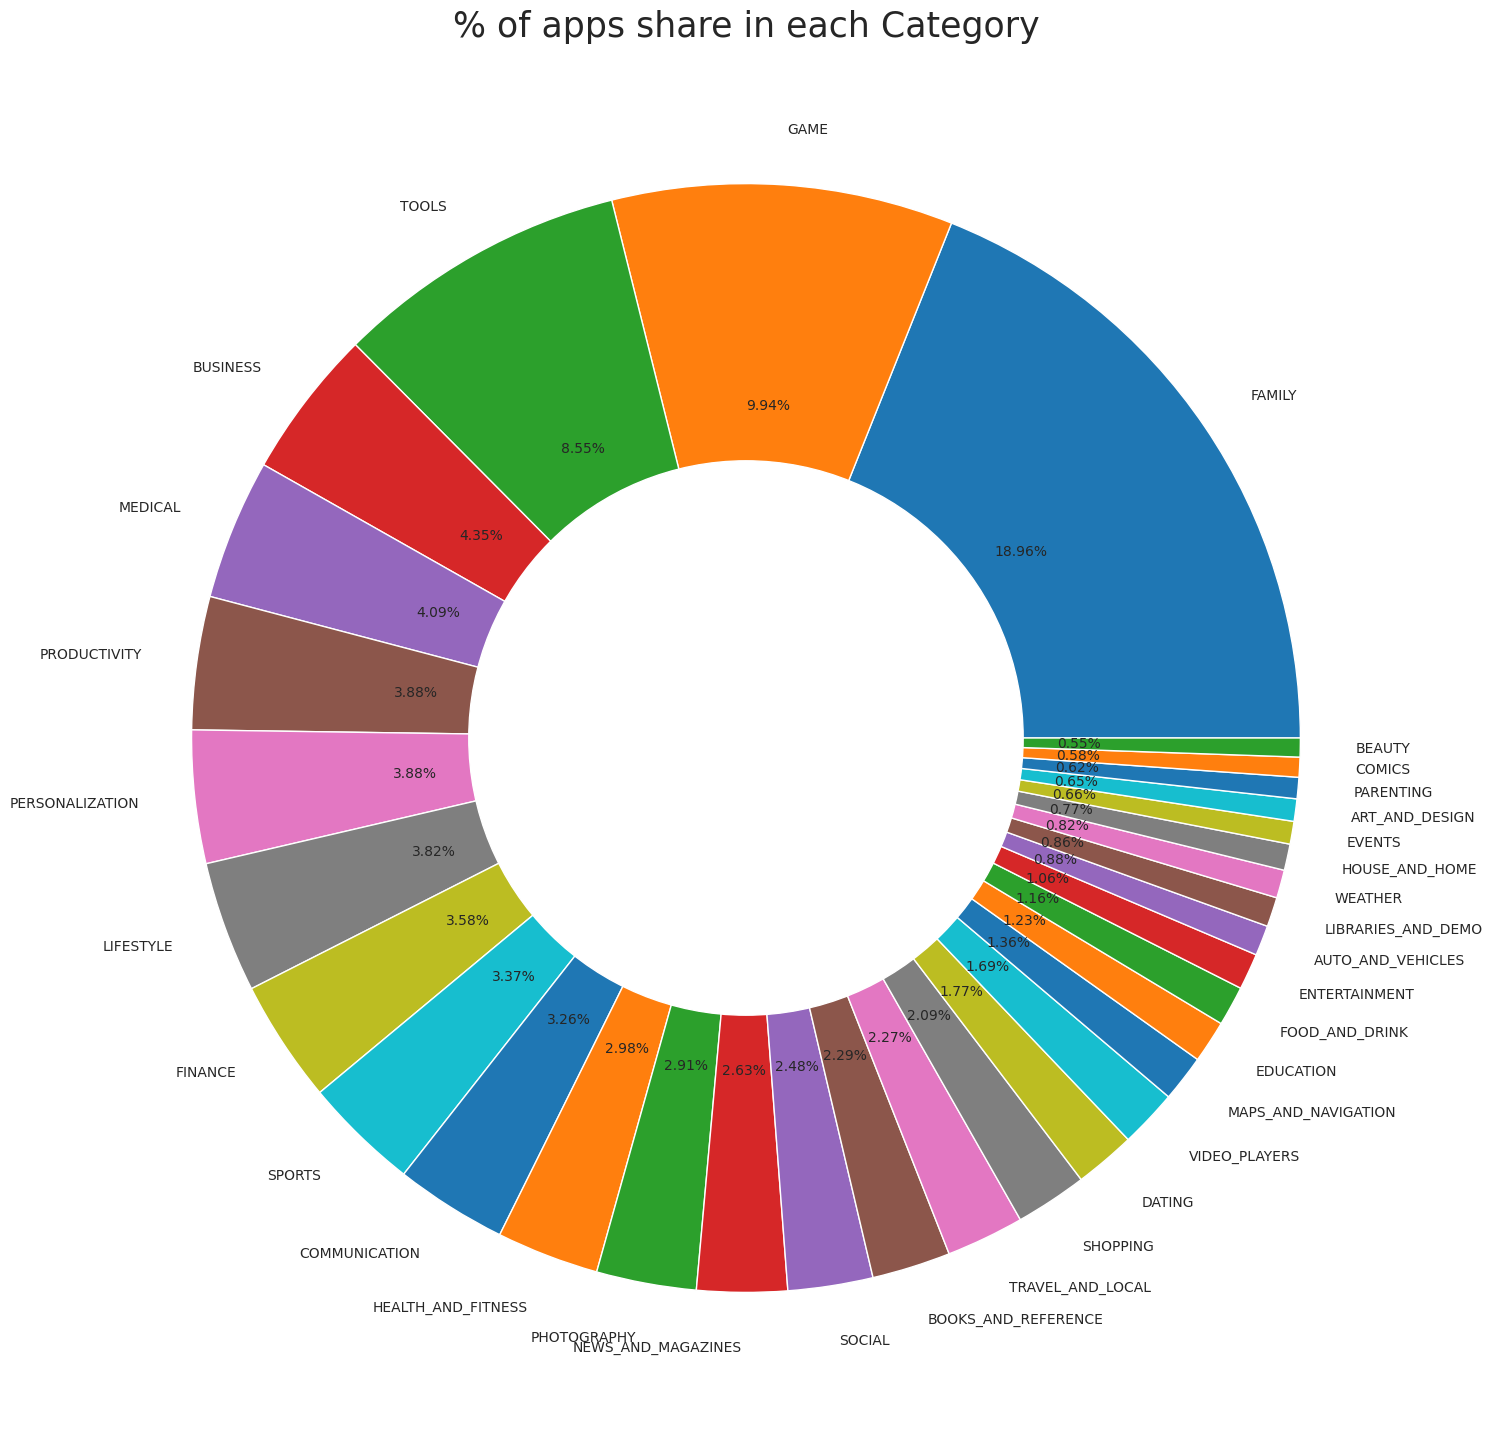

In [83]:
plt.figure(figsize=(18,18))
plt.pie(df.Category.value_counts(),labels=df.Category.value_counts().index,autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()


**Findings:**
So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under FAMILY(18.96%) & GAME(9.94%) category and least are of COMICS(0.55%) & BEAUTY(0.58%) Category.

# Q. Which category App's have most number of installs?

Text(0.5, 1.0, 'Total app installs in each category')

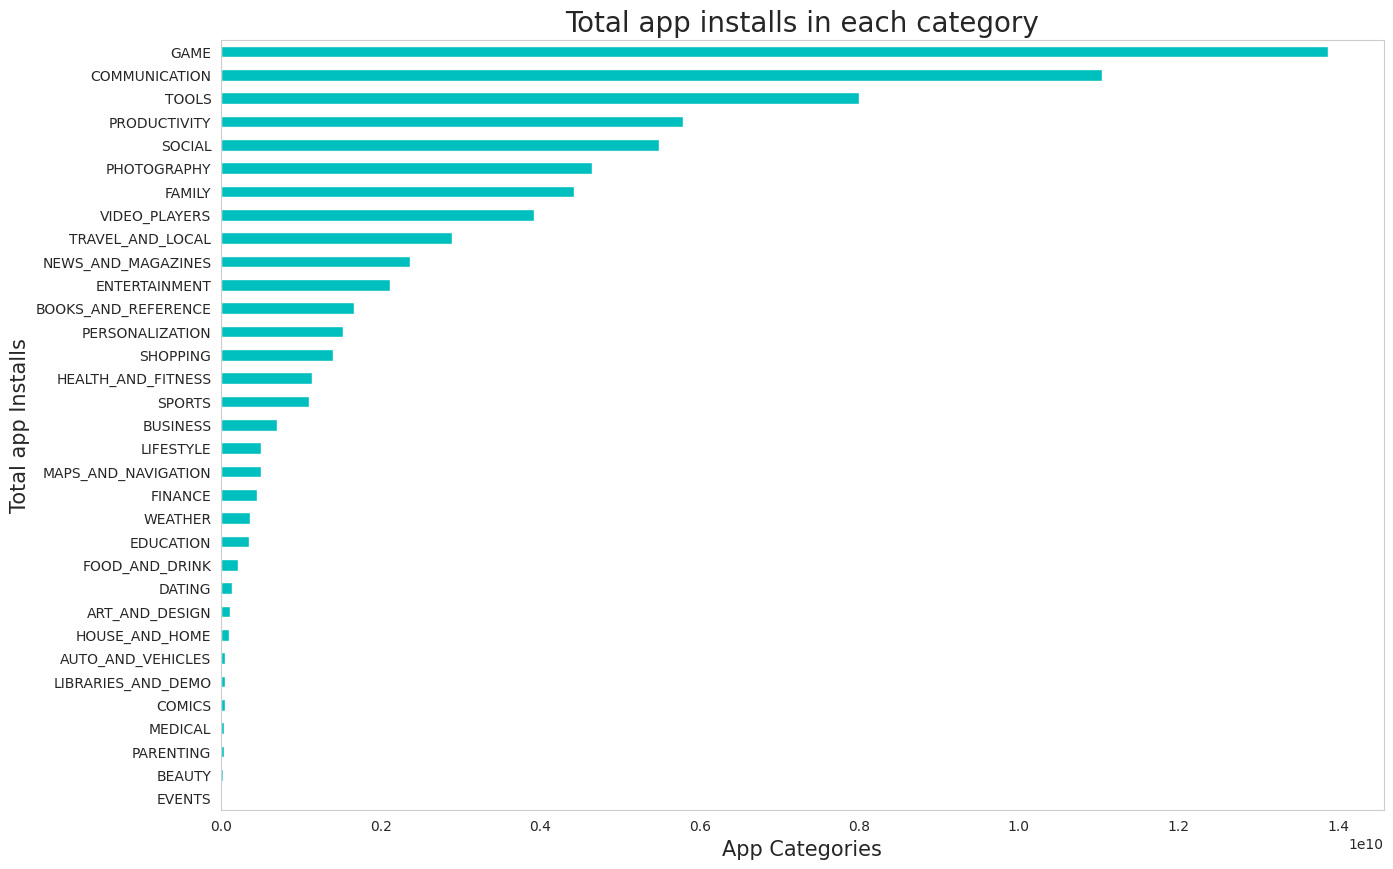

In [84]:
a = df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c',)
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

**Findings:**
The Game, Communication and Tools categories has the highest number of installs compared to other categories of apps.

# Average rating of the apps

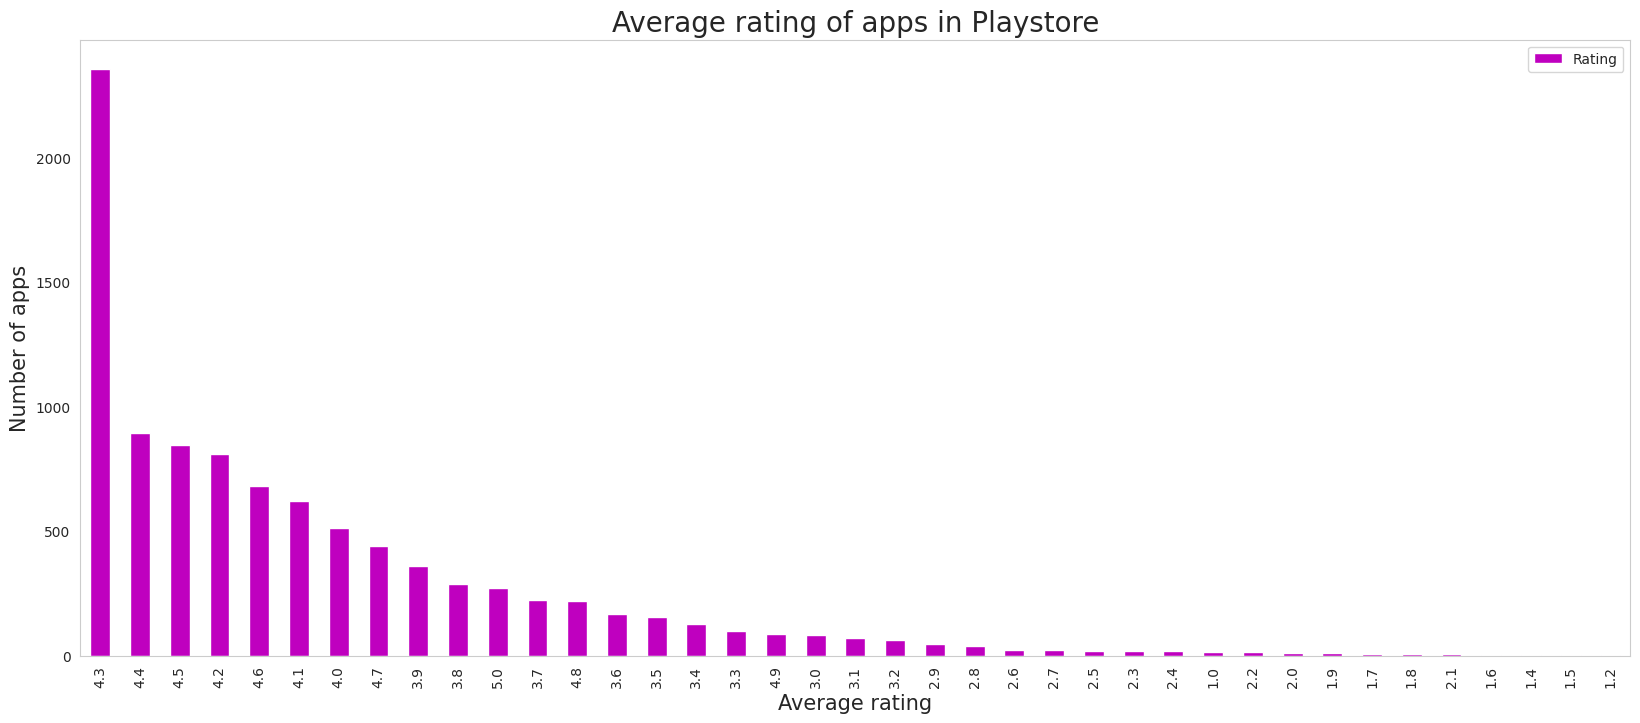

In [85]:
df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:
*   4-5: Top rated
*   3-4: Above average
*   2-3: Average
*   1-2: Below average



**Lets create a new column Rating group in the main dataframe and apply these filters.**

In [86]:
def rating_App (val):
  if val>4:
    return 'Top Rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

In [87]:
df['Rating_Group'] = df['Rating'].apply(lambda x:rating_App(x))

In [88]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

    Rating_Group  
0      Top Rated  
1  Above Average  
2      Top Rated  
3      Top Rated  
4      Top Rated

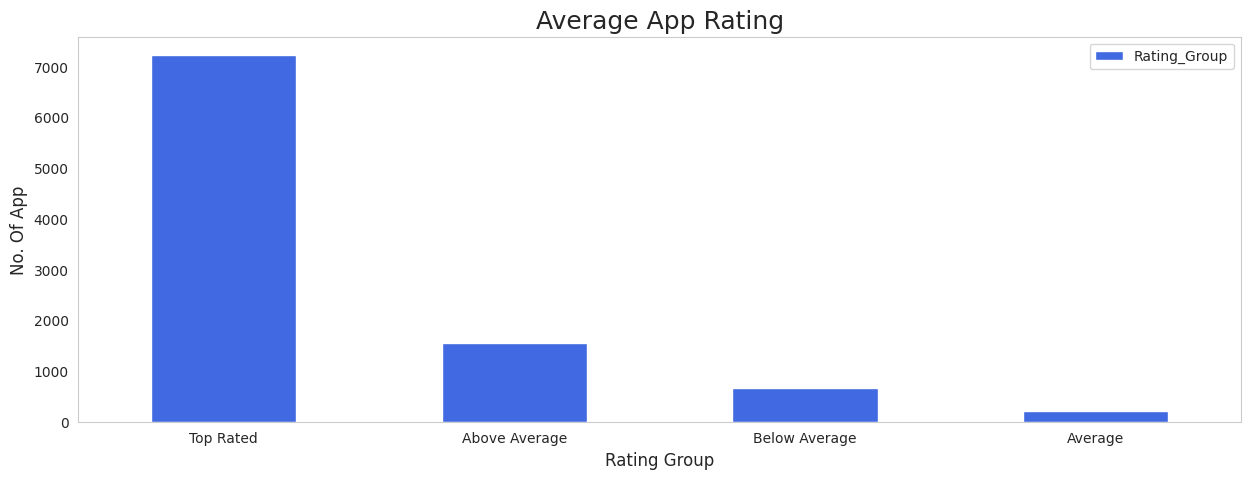

In [89]:
df['Rating_Group'].value_counts().plot.bar(figsize=(15,5),color='royalblue')
plt.xlabel('Rating Group',fontsize=12)
plt.ylabel('No. Of App',fontsize=12)
plt.title('Average App Rating',fontsize=18)
plt.xticks(rotation=0)
plt.legend()

# Q. What are the Top 10 installed apps in any category?

In [90]:
def top10App (str):
  str = str.upper()
  name=df[df['Category']==str]
  top10app=name.sort_values(by = 'Installs',ascending=False).head(10)
  plt.figure(figsize=(15,6),dpi=100)
  plt.title('Top 10 Apps',size=20)
  graph=sns.barplot(x=top10app.App,y=top10app.Installs, palette= "icefire")
  graph.set_xticklabels(graph.get_xticklabels(),rotation= 45, horizontalalignment='right')

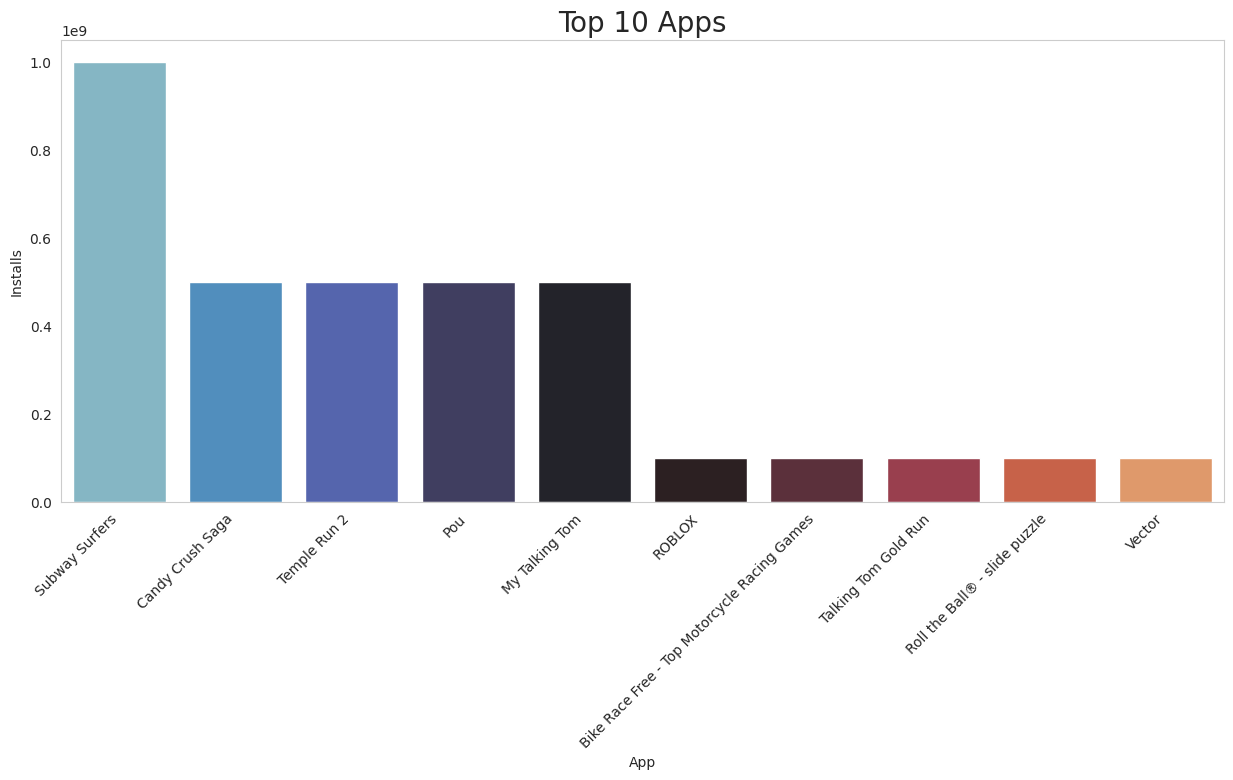

In [91]:
top10App('GAME')

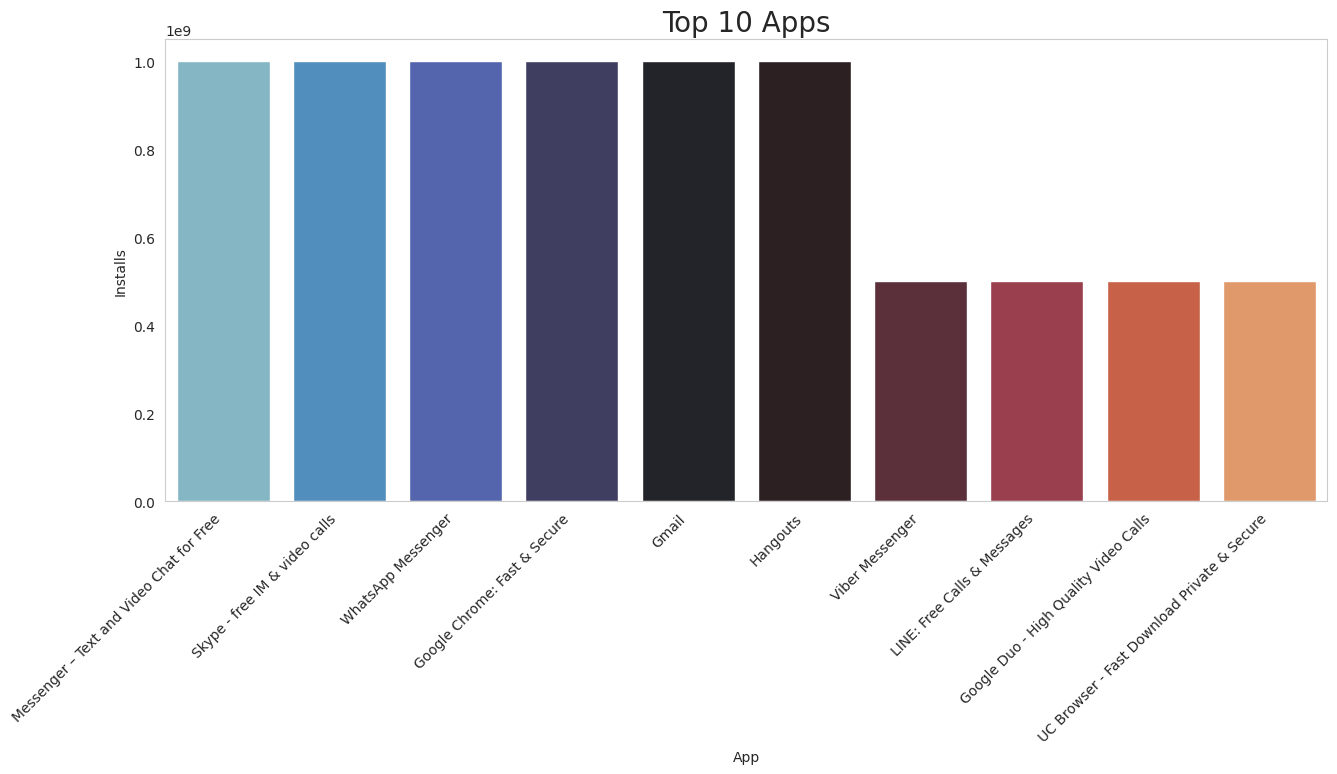

In [92]:
top10App('communication')

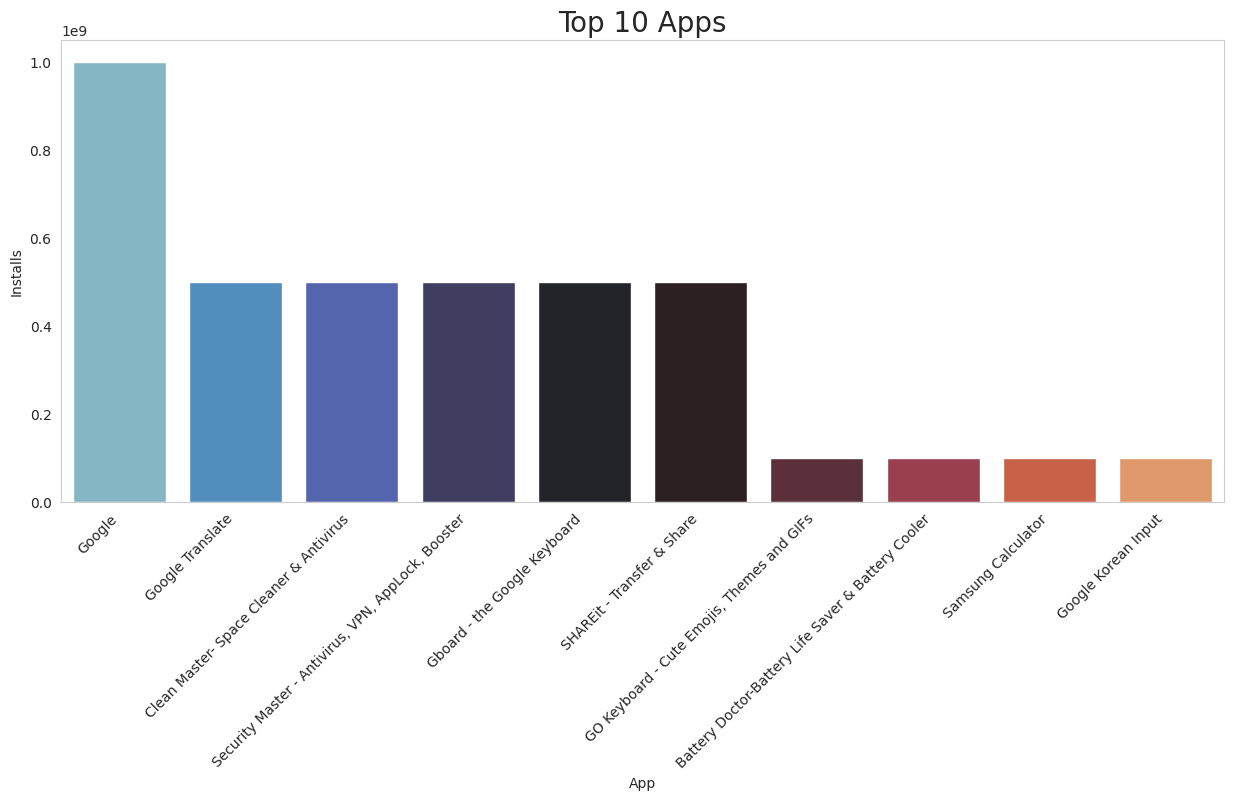

In [93]:
top10App('tools')

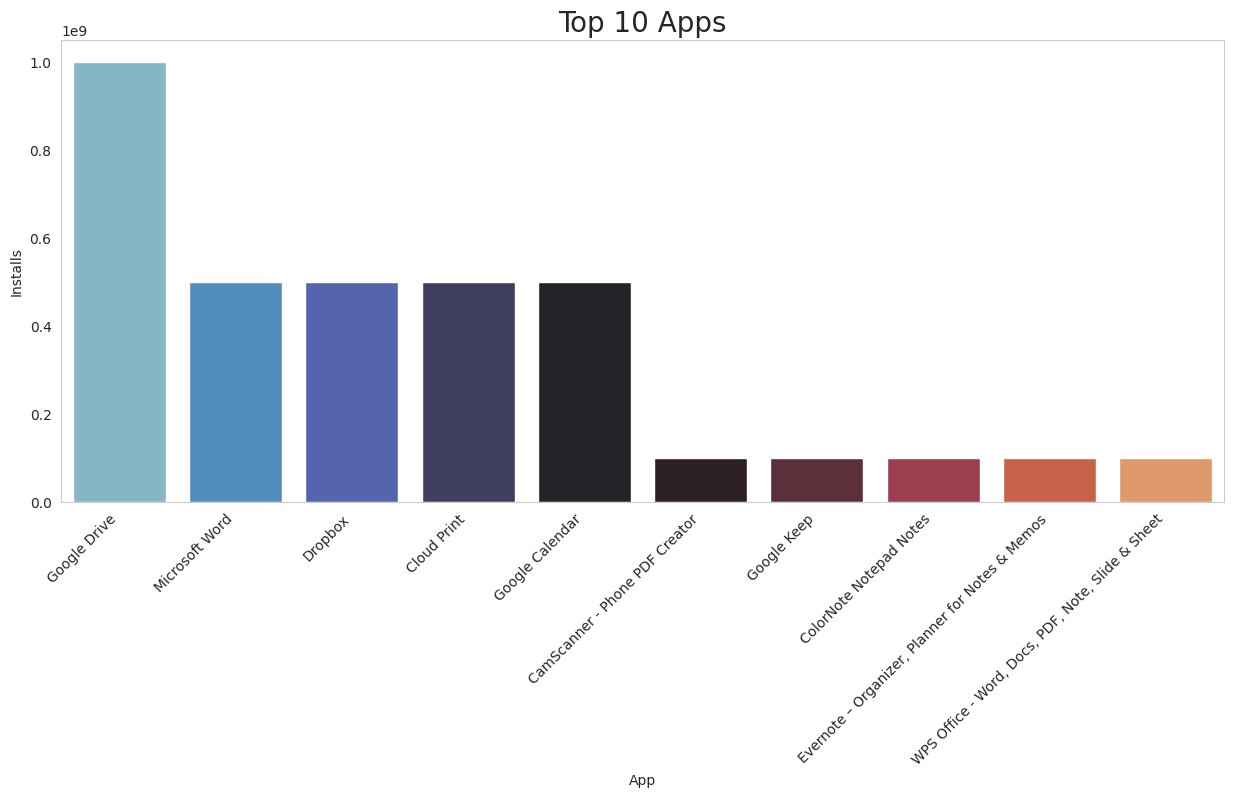

In [94]:
top10App('productivity')

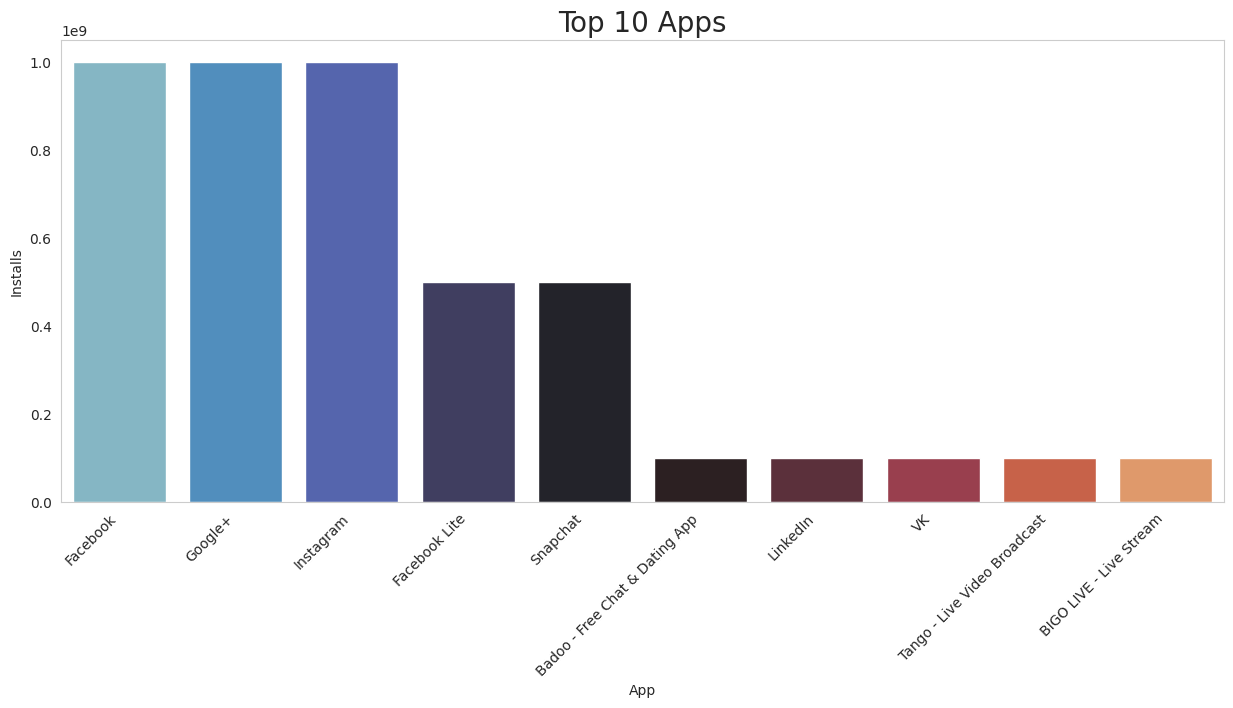

In [95]:
top10App('Social')

# Top apps that are of free type.

In [96]:
 free_df = df[df['Type'] == 'Free']


In [97]:

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

App             Category  Rating  \
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
335   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
336                         WhatsApp Messenger        COMMUNICATION     4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
340                                      Gmail        COMMUNICATION     4.3   
341                                   Hangouts        COMMUNICATION     4.0   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
865                          Google Play Games        ENTERTAINMENT     4.3   
1654                            Subway Surfers                 GAME     4.5   
2544                                  Facebook               SOCIAL     4.1   

       Reviews  Size    Installs  Type  Price Content Rating  \
152    1433233   NaN  1000000000  Free    0.0           Teen   
335   56642847   NaN  1000000000  Free    0.0       Everyone   
336   69119316   NaN  1000000000  Free    0.0       Everyone   
338    9642995   NaN  1000000000  Free    0.0       Everyone   
340    4604324   NaN  1000000000  Free    0.0       Everyone   
341    3419249   NaN  1000000000  Free    0.0       Everyone   
391   10484169   NaN  1000000000  Free    0.0       Everyone   
865    7165362   NaN  1000000000  Free    0.0           Teen   
1654  27722264  76.0  1000000000  Free    0.0   Everyone 10+   
2544  78158306   NaN  1000000000  Free    0.0           Teen   

                 Genres Last Updated         Current Ver         Android Ver  \
152   Books & Reference   2018-08-03  Varies with device  Varies with device   
335       Communication   2018-08-01  Varies with device  Varies with device   
336       Communication   2018-08-03  Varies with device  Varies with device   
338       Communication   2018-08-01  Varies with device  Varies with device   
340       Communication   2018-08-02  Varies with device  Varies with device   
341       Communication   2018-07-21  Varies with device  Varies with device   
391       Communication   2018-08-03  Varies with device  Varies with device   
865       Entertainment   2018-07-16  Varies with device  Varies with device   
1654             Arcade   2018-07-12              1.90.0          4.1 and up   
2544             Social   2018-08-03  Varies with device  Varies with device   

       Rating_Group  
152   Above Average  
335   Below Average  
336       Top Rated  
338       Top Rated  
340       Top Rated  
341   Below Average  
391       Top Rated  
865       Top Rated  
1654      Top Rated  
2544      Top Rated

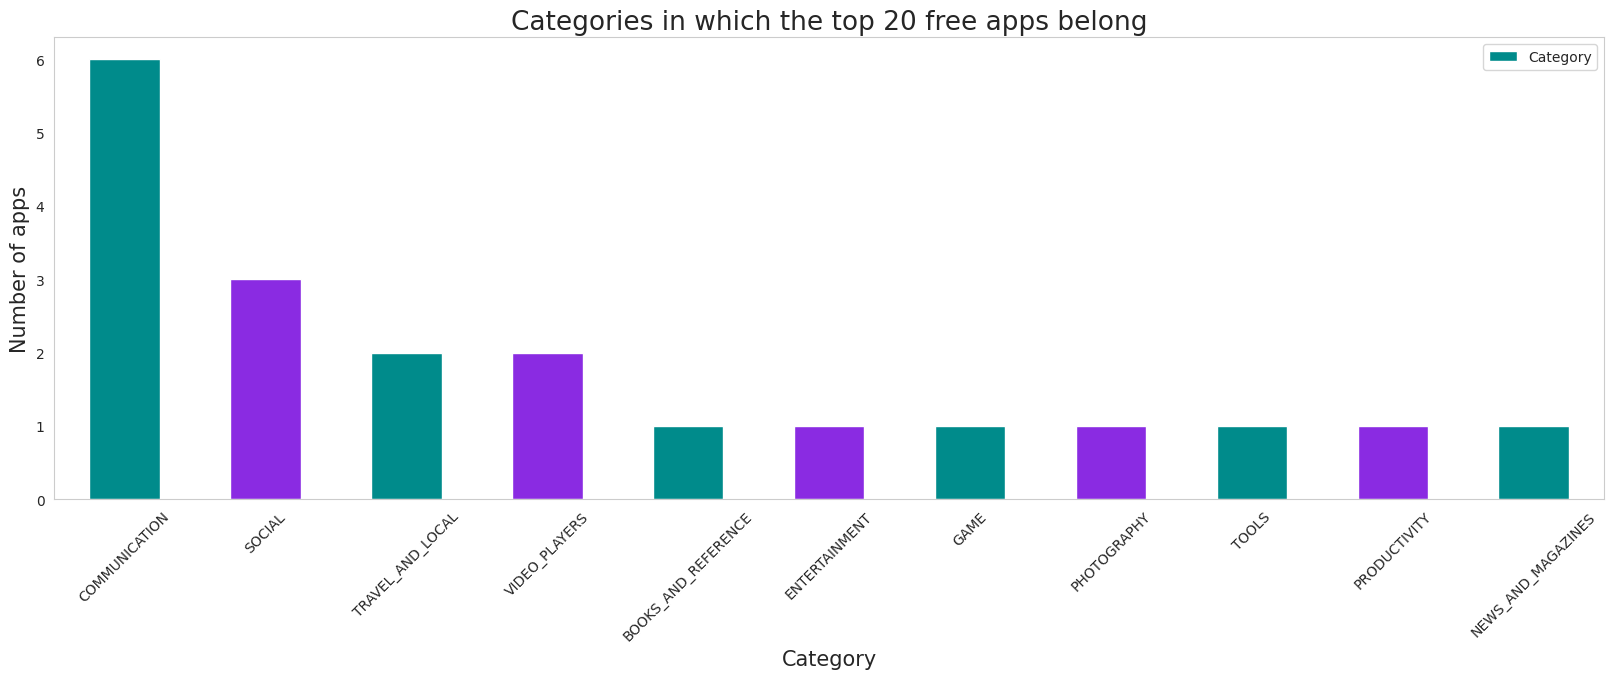

In [98]:
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

# Top apps that are of paid type.

<Axes: xlabel='Price'>

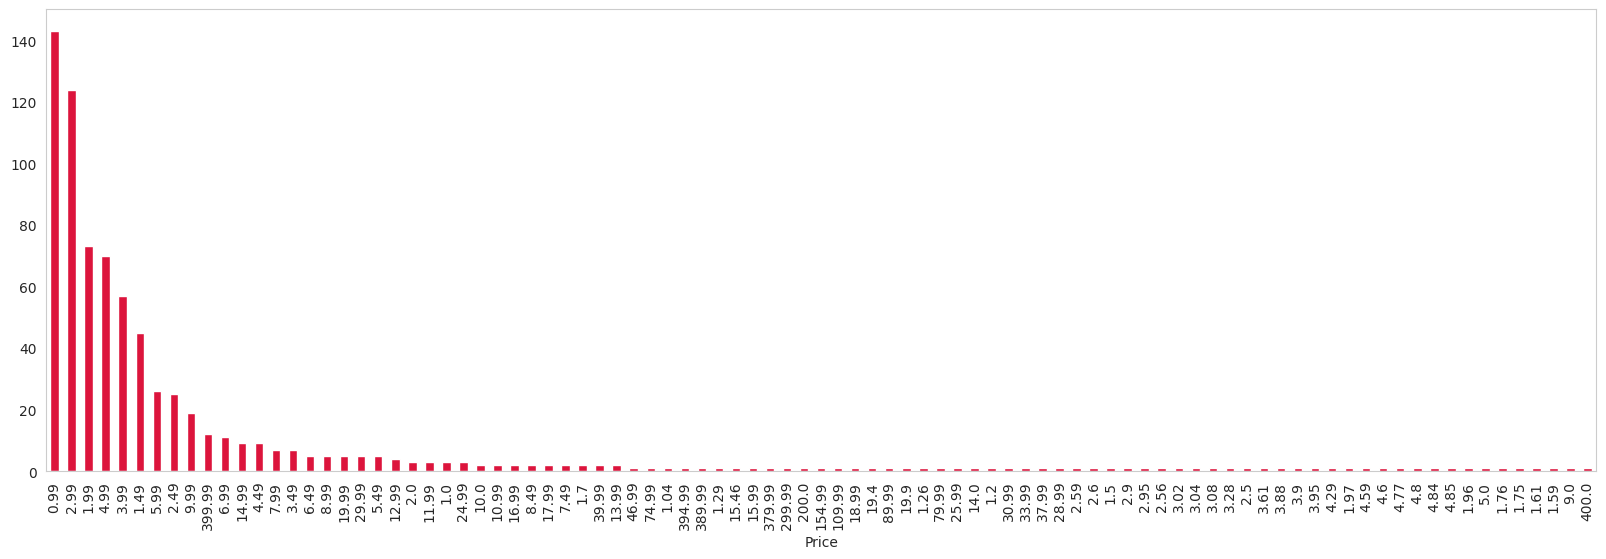

In [99]:
paid_df = df[df['Type']=='Paid']
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [100]:
paid_df['Revenue']=paid_df['Price']*paid_df['Installs']
paid_df.head()

<ipython-input-100-2a09871a646b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue']=paid_df['Price']*paid_df['Installs']


App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

     Reviews  Size  Installs  Type  Price Content Rating         Genres  \
234    11442   6.8    100000  Paid   4.99       Everyone       Business   
235    10295  39.0    100000  Paid   4.99       Everyone       Business   
427    18247   NaN    100000  Paid   3.99       Everyone  Communication   
476     1545   NaN     10000  Paid   3.99     Mature 17+         Dating   
477       57   6.2      1000  Paid   6.99       Everyone         Dating   

    Last Updated  Current Ver Android Ver   Rating_Group   Revenue  
234   2018-03-25        1.5.2  4.0 and up      Top Rated  499000.0  
235   2017-04-11        3.4.6  3.0 and up      Top Rated  499000.0  
427   2018-07-05  7.5.3.20547  4.1 and up  Below Average  399000.0  
476   2018-06-19      2.6.139  4.1 and up      Top Rated   39900.0  
477   2017-10-25        1.1.6  4.0 and up        Average    6990.0

In [101]:
top10paidapps = paid_df.nlargest(10,'Revenue')

In [102]:
top10paidapps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

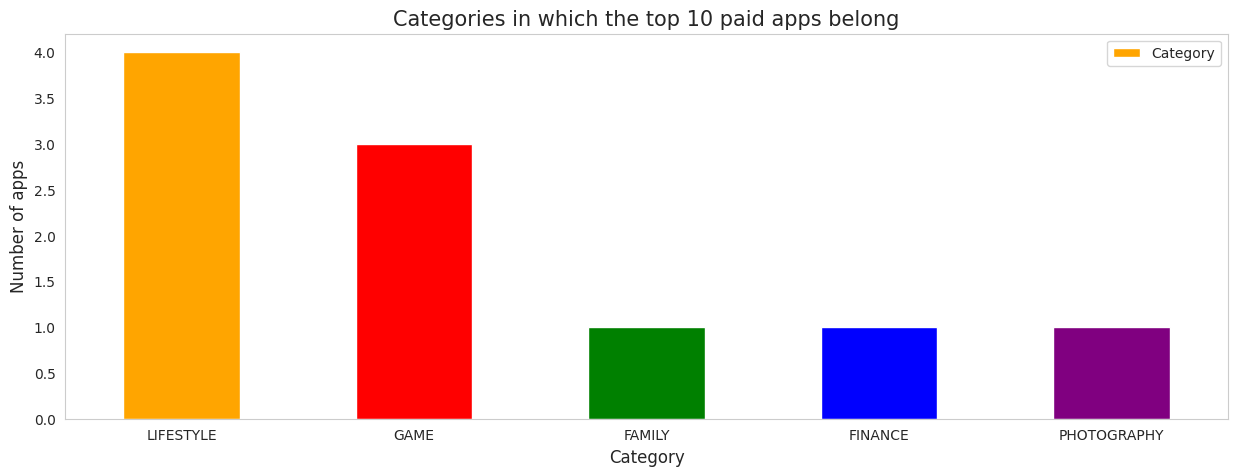

In [103]:
# Categories in which the top 10 paid apps belong to
top10paidapps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


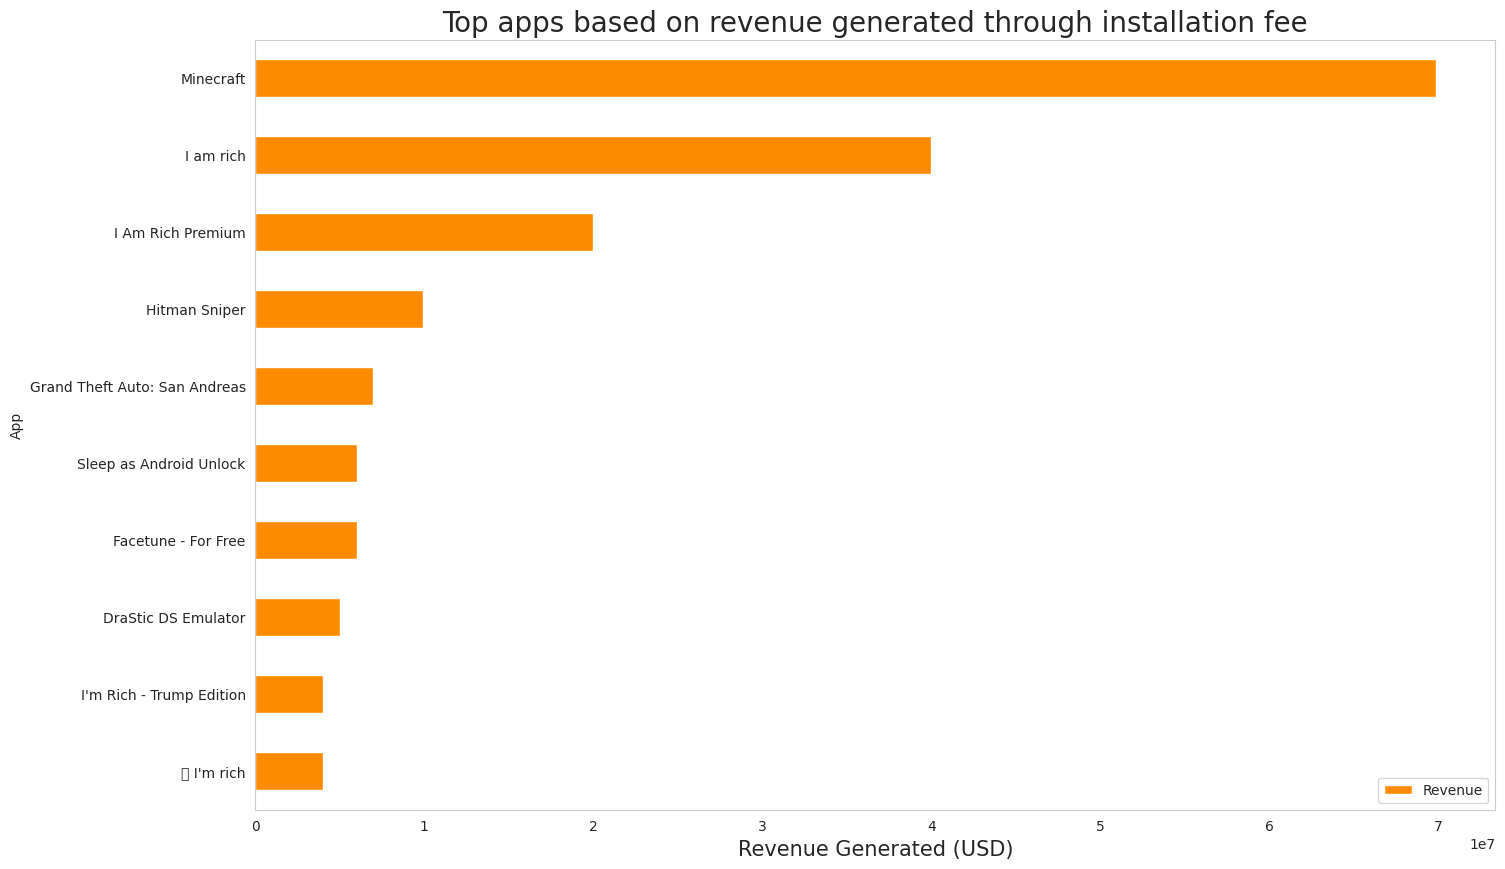

In [104]:
# Top paid apps according to the revenue generated through installs alone
top10paidapps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

In [105]:
max_size = df[df['Size'] != 'Varies with device']['Size'].max()

min_size = df[df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(df[df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = df[df['Size'] != 'Varies with device']['Size'].median()

In [106]:
[mean_size,median_size,max_size,min_size]

[20.4136, 12.0, 100.0, 0.0083]

The size of an app in our database varies from 100 MB to 0.0083 MB.
We can analyse the size of the apps if we can group them into certain intervals.

In [107]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

In [108]:
df['size_group']=df['Size'].apply(lambda x : size_apps(x))
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

    Rating_Group size_group  
0      Top Rated      10-20  
1  Above Average      10-20  
2      Top Rated       1-10  
3      Top Rated      20-30  
4      Top Rated       1-10

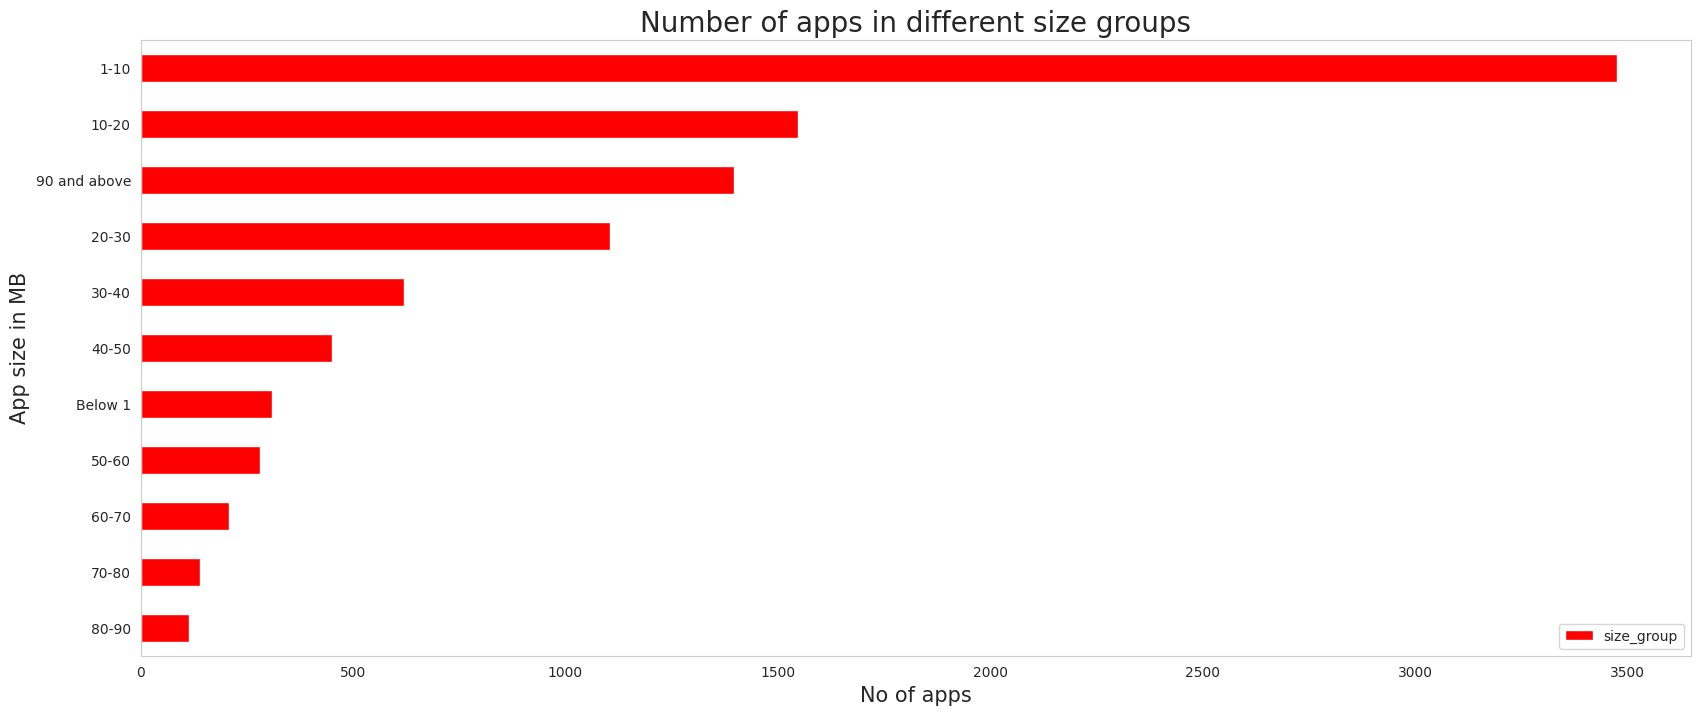

In [109]:
df['size_group'].value_counts().plot.barh(figsize=(20,8),color='r').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

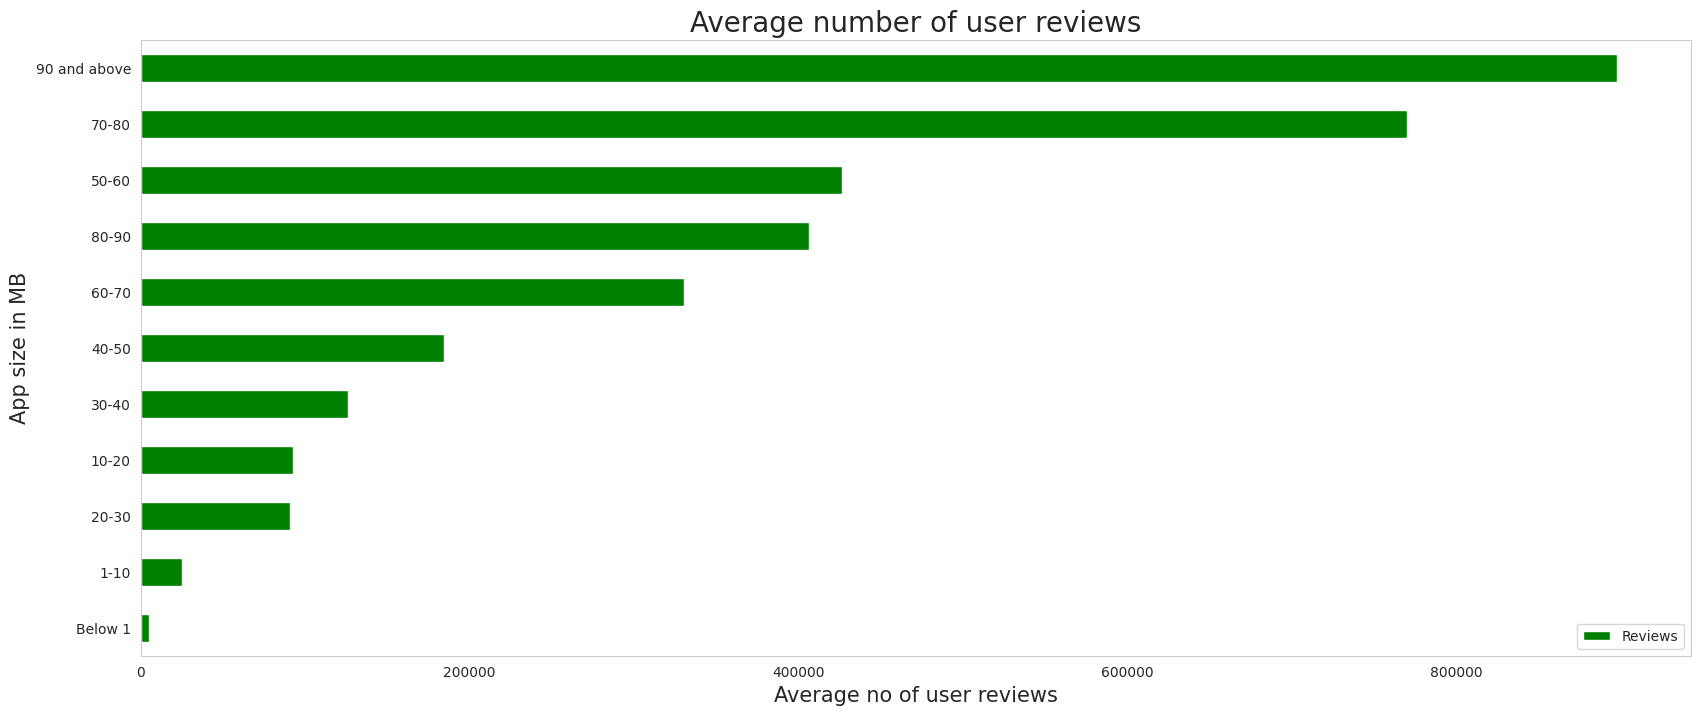

In [110]:
df.groupby('size_group')['Reviews'].mean().sort_values().plot.barh(figsize=(20,8), color = 'green')
plt.title("Average number of user reviews", size=20)
plt.xlabel('Average no of user reviews', size=15)
plt.ylabel('App size in MB', size=15)
plt.legend()

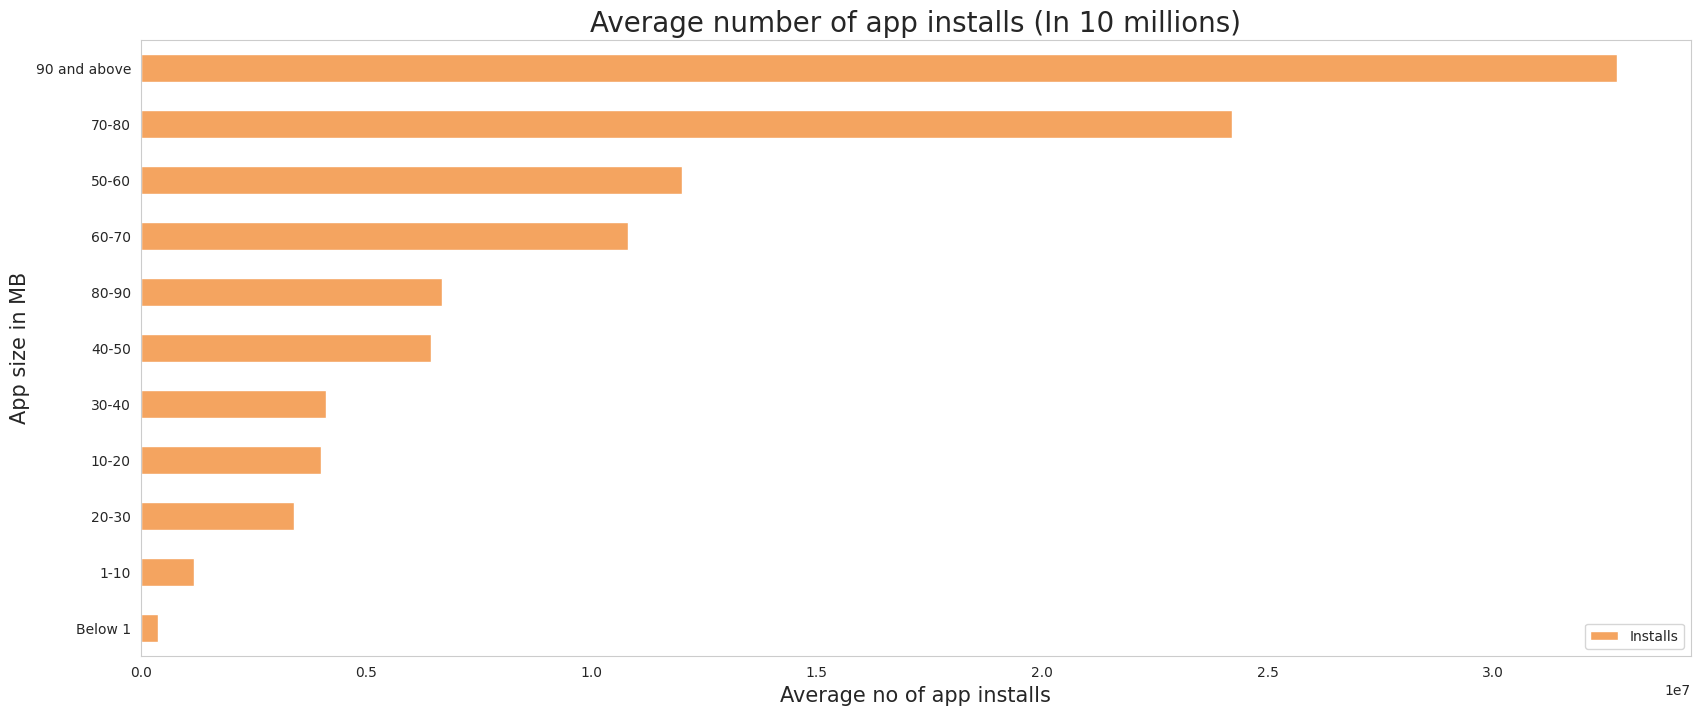

In [111]:
df.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.barh(figsize=(20,8),color='sandybrown').invert_yaxis()
plt.title("Average number of app installs (In 10 millions)", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('Average no of app installs',  size=15)
plt.legend()

**Findings:**


*   The sizes of the majority of the apps range in between 1 and 20 MB.
*   There are a good number of apps whose size varies with the device.

*   The apps which are smaller in size on average have lower no of app installs and user reviews.






# **Sentiment Analysis**

In [112]:
ur_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

# 1) Percentage of Review Sentiments

In [113]:
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

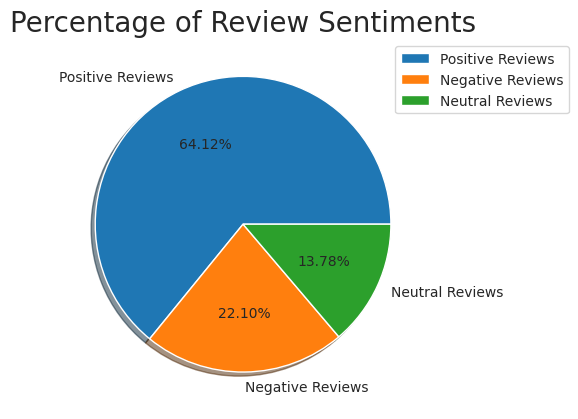

In [114]:
sentiments = ur_df['Sentiment'].value_counts()
labels = 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.pie(sentiments,autopct='%.2f%%',labels = labels,shadow='True')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))

**Findings:**


1.   Positive reviews are 64.30%

1.   Negative reviews are 22.80%
2.   Neutral reviews are 12.90%






# **2) Apps with the highest number of positive reviews**

In [115]:
Positive_df = ur_df[ur_df['Sentiment']=='Positive']

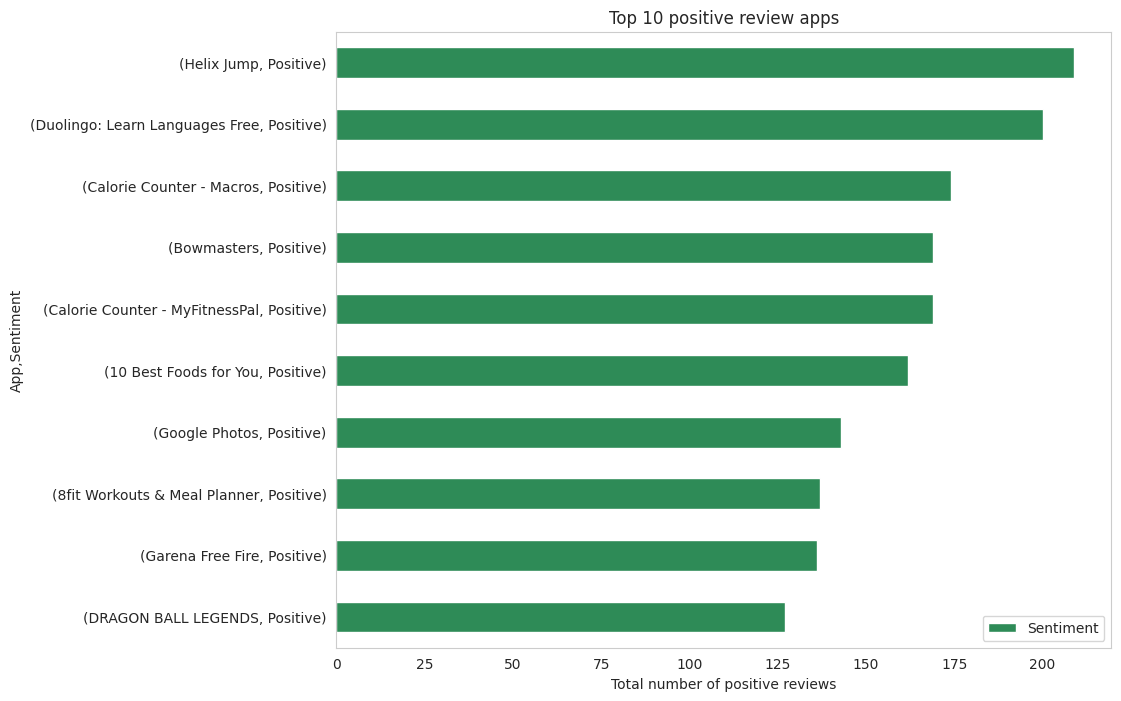

In [116]:
Positive_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

# **3) Apps with the highest number of negative reviews.**

In [117]:
Negative_df = ur_df[ur_df['Sentiment']=='Negative']

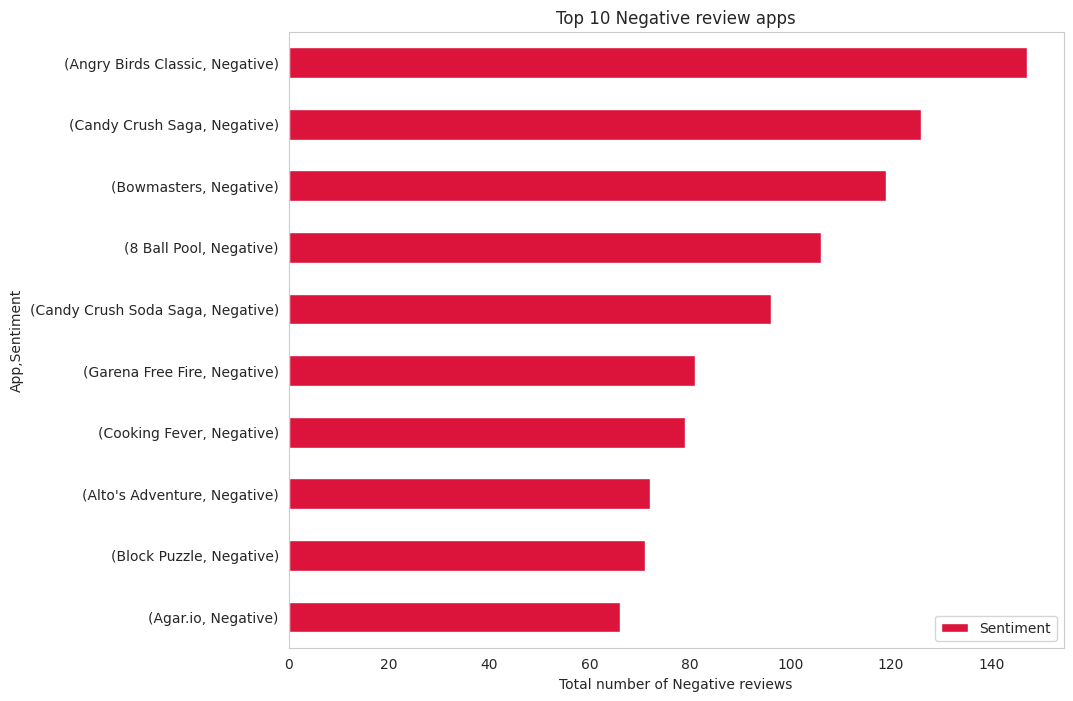

In [118]:
Negative_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='crimson').invert_yaxis()
plt.title("Top 10 Negative review apps")
plt.xlabel('Total number of Negative reviews')
plt.legend()

In [119]:
ur_df.Sentiment_Subjectivity.value_counts()

0.000000    4411
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

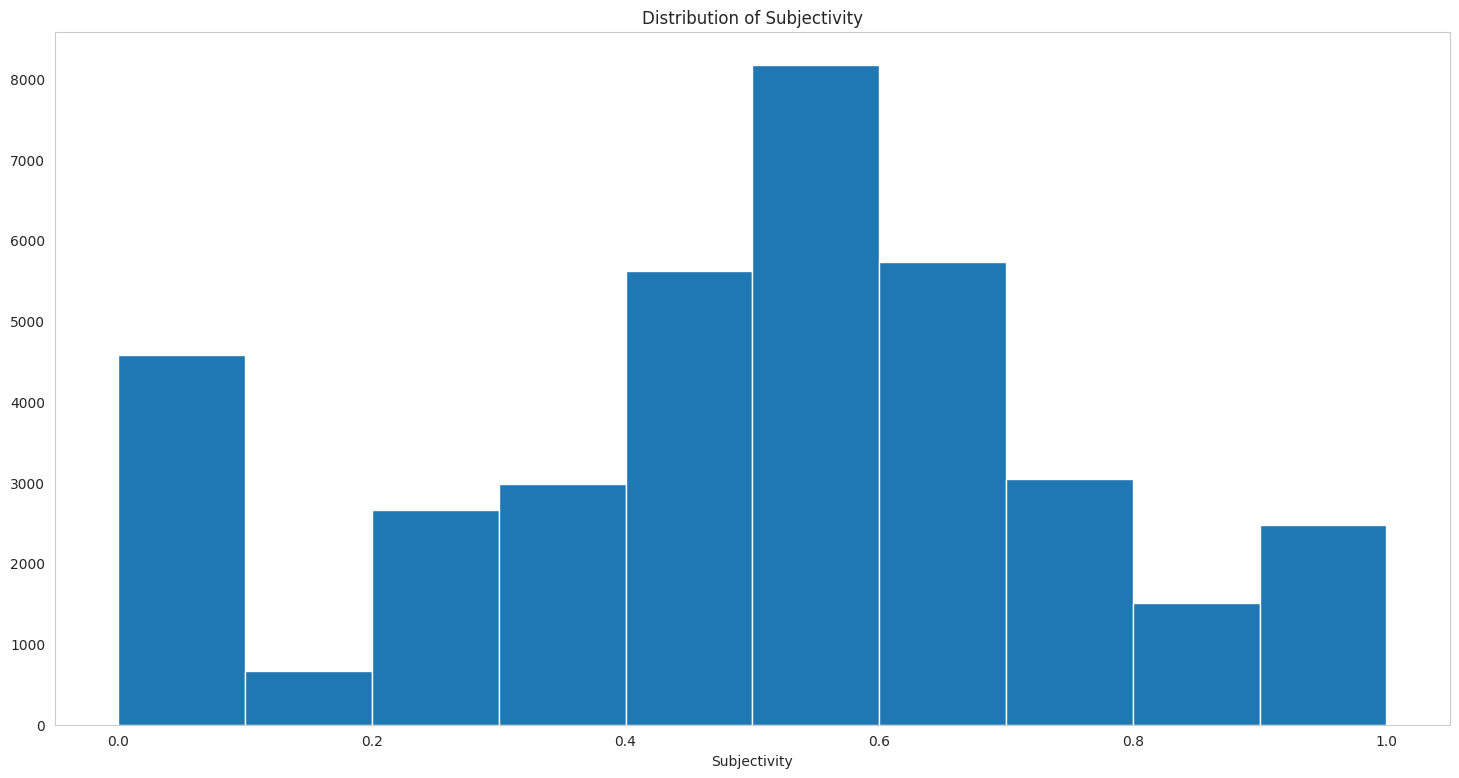

In [120]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(ur_df[ur_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**Findings:**
It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

# How Content Rating affect over the App

**1) Paid App Content Rating**

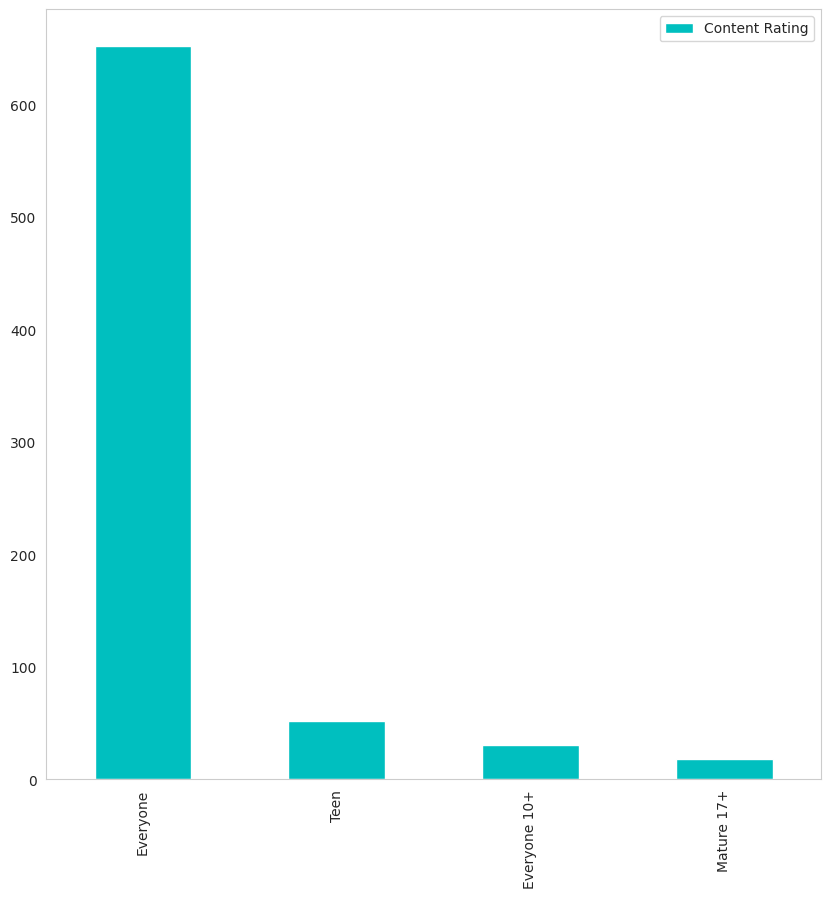

In [121]:
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

**2) Free App content Rating**

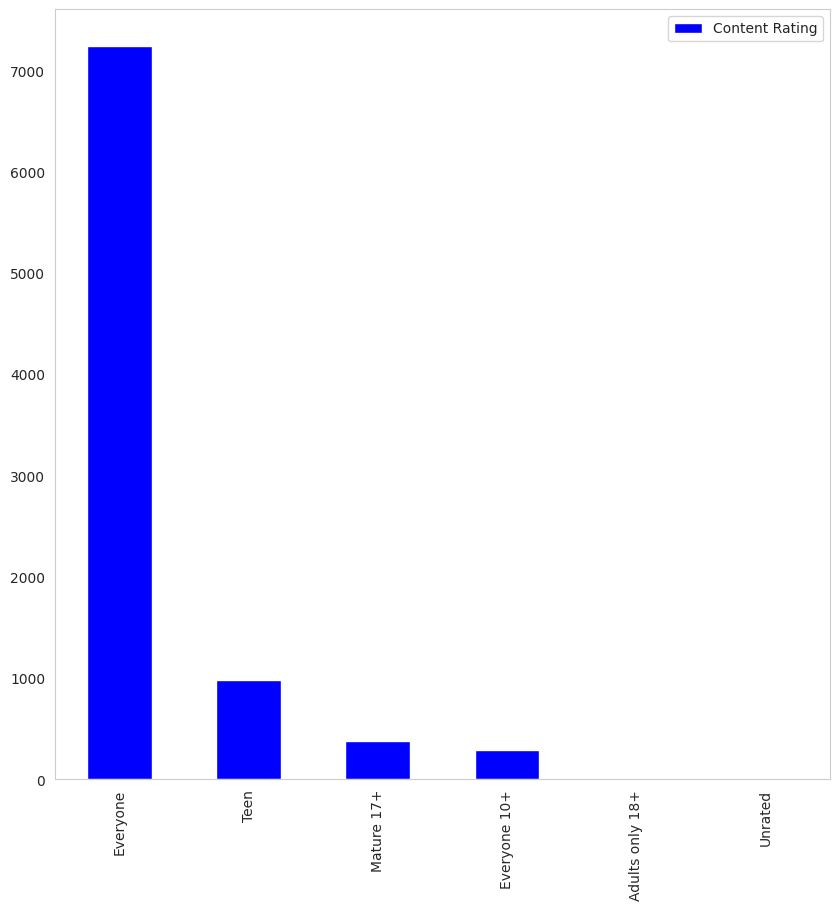

In [122]:
free_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='blue')
plt.legend()

**Findings:**
Most Number of content ratings which got on Google Play Store can be used by everyone.The remaining apps have various age restrictions to use it.